In [10]:
#Import libraries
import pandas as pd
import numpy as np
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import sklearn.utils
from sklearn.preprocessing import RobustScaler #Scaling the features
from sklearn.model_selection import StratifiedShuffleSplit #Splitting the dataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
from sklearn.model_selection import GridSearchCV #hyperparameter tuning

!pip install imbalanced-learn

from imblearn.over_sampling import ADASYN #Adaptive Synthetic Oversampling
from collections import Counter
from scipy import stats

!pip install xgboost


  Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
  Using cached scipy-1.15.2-cp310-cp310-win_amd64.whl (41.2 MB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)
  Using cached numpy-2.2.4-cp310-cp310-win_amd64.whl (12.9 MB)
  Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl (11.1 MB)


You should consider upgrading via the 'C:\Users\Vishal Kumar\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


  Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)


You should consider upgrading via the 'C:\Users\Vishal Kumar\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## DATASET ANALYSIS AND PREPROCESSING

In [11]:
#Loading data in a dataframe 'creditcard_data' and using head() to display the first 5 instances.
creditcard_data= pd.read_csv("Documents/Intern/creditcard.csv")
creditcard_data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [12]:
#Use parameter 'n' to display instances other than 5.
creditcard_data.head(n=20)

Time        V1        V2        V3        V4        V5        V6  \
0    0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1    0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2    1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3    1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4    2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
5    2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
6    4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
7    7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
8    7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818   
9    9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   
10  10.0  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
11  10.0  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027   
12  10.0  1.249999 -1.221637  0.383930 -1.234899 -1.485419 -0.753230   
13  11.0  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544   
14  12.0 -2.791855 -0.327771  1.641750  1.767473 -0.136588  0.807596   
15  12.0 -0.752417  0.345485  2.057323 -1.468643 -1.158394 -0.077850   
16  12.0  1.103215 -0.040296  1.267332  1.289091 -0.735997  0.288069   
17  13.0 -0.436905  0.918966  0.924591 -0.727219  0.915679 -0.127867   
18  14.0 -5.401258 -5.450148  1.186305  1.736239  3.049106 -1.763406   
19  15.0  1.492936 -1.029346  0.454795 -1.438026 -1.555434 -0.720961   

          V7        V8        V9  ...       V21       V22       V23       V24  \
0   0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1  -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2   0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3   0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4   0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   
5   0.476201  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427   
6  -0.005159  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055   
7   1.120631 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709   
8   0.370145  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592   
9   0.651583  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050   
10 -1.423236  0.048456 -1.720408  ... -0.009302  0.313894  0.027740  0.500512   
11  0.470455  0.538247 -0.558895  ...  0.049924  0.238422  0.009130  0.996710   
12 -0.689405 -0.227487 -2.094011  ... -0.231809 -0.483285  0.084668  0.392831   
13 -0.096717  0.115982 -0.221083  ... -0.036876  0.074412 -0.071407  0.104744   
14 -0.422911 -1.907107  0.755713  ...  1.151663  0.222182  1.020586  0.028317   
15 -0.608581  0.003603 -0.436167  ...  0.499625  1.353650 -0.256573 -0.065084   
16 -0.586057  0.189380  0.782333  ... -0.024612  0.196002  0.013802  0.103758   
17  0.707642  0.087962 -0.665271  ... -0.194796 -0.672638 -0.156858 -0.888386   
18 -1.559738  0.160842  1.233090  ... -0.503600  0.984460  2.458589  0.042119   
19 -1.080664 -0.053127 -1.978682  ... -0.177650 -0.175074  0.040002  0.295814   

         V25       V26       V27       V28  Amount  Class  
0   0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1   0.167170  0.125895 -0.008983  0.014724    2.69      0  
2  -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3   0.647376 -0.221929  0.062723  0.061458  123.50      0  
4  -0.206010  0.502292  0.219422  0.215153   69.99      0  
5  -0.232794  0.105915  0.253844  0.081080    3.67      0  
6   0.750137 -0.257237  0.034507  0.005168    4.99      0  
7  -0.415267 -0.051634 -1.206921 -1.085339   40.80      0  
8   0.373205 -0.384157  0.011747  0.142404   93.20      0  
9  -0.069733  0.094199  0.246219  0.083076    3.68      0  
10  0.251367 -0.129478  0.042850  0.016253    7.80      0  
11 -0.767315 -0.492208  0.042472 -0.054337    9.99      0  
12  0.161

In [13]:
#Number of instances and attributes,i.e., Dimensionality of the dataset
creditcard_data.shape

(284807, 31)

In [14]:
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

This shows that there are 284807 instances and 31 attributes including the class attribute.

In [15]:
#Sum of missing cells for each attribute
creditcard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The 0 sum for all attributes shows that there are no missing values.

In [16]:
#Number of distinct categories or classes i.e., Fraudulent and Genuine
creditcard_data['Class'].nunique()

2

As expected, there are only 2 classes.

In [17]:
#number of instances per class
creditcard_data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This shows a complete imbalance of classes. There are 284315 'Genuine' (0) instances and only 492 'Fraudulent' (1) instances.

<Axes: xlabel='Class'>

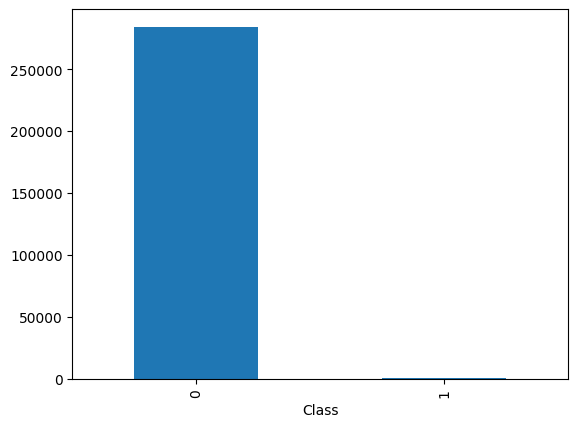

In [18]:
#visual representation of instances per class
creditcard_data.Class.value_counts().plot.bar()

This gives a visual representation of the class imbalance. The below plot after PCA gives a better visualization of the imbalnce in the datasets.

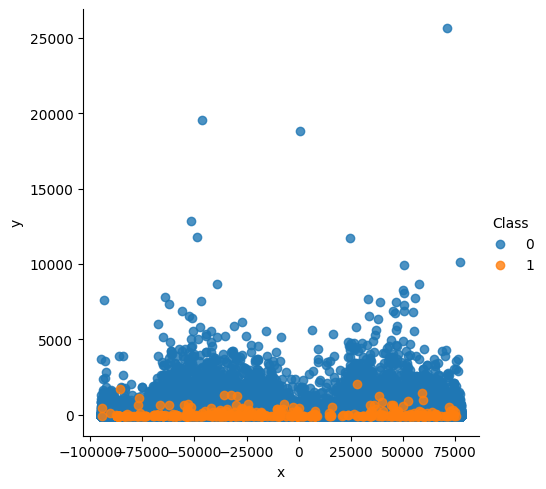

In [19]:
#Before sampling (PCA is performed for visualization only)
pca= PCA(n_components=2)
creditcard_2d= pd.DataFrame(pca.fit_transform(creditcard_data.iloc[:,0:30]))
creditcard_2d= pd.concat([creditcard_2d, creditcard_data['Class']], axis=1)
creditcard_2d.columns= ['x', 'y', 'Class']
sns.lmplot(x='x', y='y', data=creditcard_2d, fit_reg=False, hue='Class')

In [20]:
#Descriptive Statistics
creditcard_data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [21]:
#checking the percentage of each class in the dataset
(creditcard_data.Class.value_counts())/(creditcard_data.Class.count())

Class
0    0.998273
1    0.001727
Name: count, dtype: float64

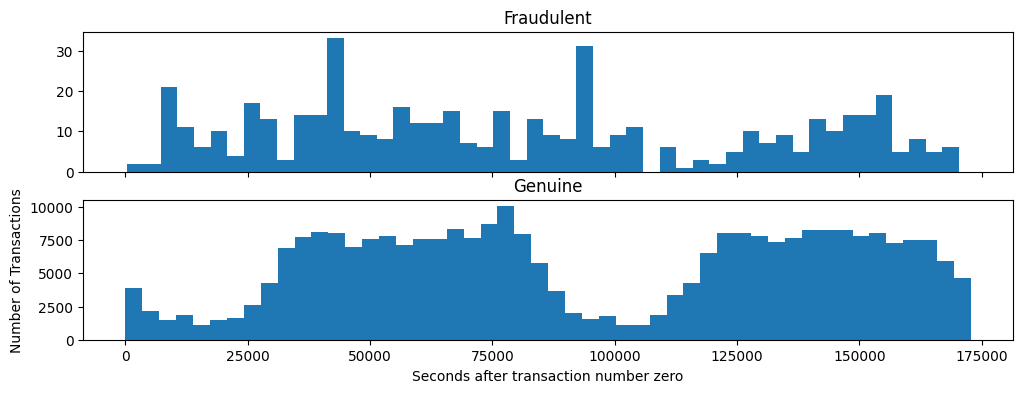

In [22]:
#Histrogram for feature Time
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

ax1.hist(creditcard_data["Time"][creditcard_data["Class"] == 1], bins = 50)
ax1.set_title('Fraudulent')

ax2.hist(creditcard_data["Time"][creditcard_data["Class"] == 0], bins = 50)
ax2.set_title('Genuine')

plt.xlabel('Seconds after transaction number zero')
plt.ylabel('Number of Transactions')
plt.show()

In [23]:
#dropping Time because it does not give any valuable information
creditcard_data = creditcard_data.drop("Time", axis = 1)
creditcard_data.shape

(284807, 30)

Now there are 30 features in the dataset.

In [24]:
#Descriptive statistics for Fraudulent Transactions
print("Fraudulent Transactions")
creditcard_data['Amount'][creditcard_data['Class']==1]. describe()

Fraudulent Transactions


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [25]:
#Descriptive statistics for Genuine Transactions
print("Genuine Transactions")
creditcard_data['Amount'][creditcard_data['Class']==0]. describe()

Genuine Transactions


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Nothing much can be determined from the Amount, as most of the transactions are around 100 in both cases..

In [26]:
#Variance
creditcard_data.var()

V1            3.836489
V2            2.726820
V3            2.299029
V4            2.004684
V5            1.905081
V6            1.774946
V7            1.530401
V8            1.426479
V9            1.206992
V10           1.185594
V11           1.041855
V12           0.998403
V13           0.990571
V14           0.918906
V15           0.837803
V16           0.767819
V17           0.721373
V18           0.702539
V19           0.662662
V20           0.594325
V21           0.539526
V22           0.526643
V23           0.389951
V24           0.366808
V25           0.271731
V26           0.232543
V27           0.162919
V28           0.108955
Amount    62560.069046
Class         0.001725
dtype: float64

Amount needs to be scaled. As if a feature has a variance orders of magnitude larger than the rest of the features, then it might dominate and, make the estimator unable to learn from other features as expected.

<Axes: xlabel='Class', ylabel='Amount'>

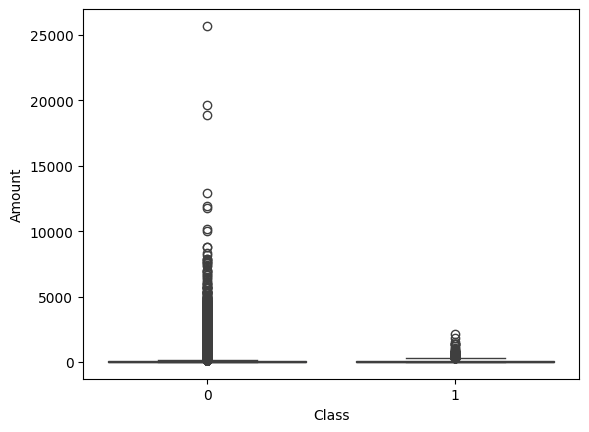

In [27]:
#Boxplot for the Amount feature, in order to visualiza the outliers.
sns.boxplot(x=creditcard_data['Class'], y=creditcard_data['Amount'])

The non-fraudulent instances are highly skewed. The outliers can be seen visually and thus, it's better to use a Robust Scaler to scale the feature 'Amount' as it is less prone to outliers.

In [28]:
#Standardizing the Amount column (All other 'V' columns are already scaled as they've undergone PCA transformation).
Rob_scaler=RobustScaler() #Robust to outliers
creditcard_data['Std_Amount'] = Rob_scaler.fit_transform(creditcard_data['Amount'].values.reshape(-1, 1))
creditcard_data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  Std_Amount  
0 -0.189115  0.133558 -0.021053  149.62      0    1.783274  
1  0.125895 -0.008983  0.014724    2.69      0   -0.269825  
2 -0.139097 -0.055353 -0.059752  378.66      0    4.983721  
3 -0.221929  0.062723  0.061458  123.50      0    1.418291  
4  0.502292  0.219422  0.215153   69.99      0    0.670579  

[5 rows x 31 columns]

In [29]:
#drop Amount and move Std_Amount at index '0'
creditcard_data = creditcard_data.drop('Amount',axis=1)

Std_Amount = creditcard_data['Std_Amount']
creditcard_data.drop('Std_Amount', axis=1, inplace=True)
creditcard_data.insert(0, 'Std_Amount', Std_Amount)
creditcard_data.head()

Std_Amount        V1        V2        V3        V4        V5        V6  \
0    1.783274 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1   -0.269825  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2    4.983721 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3    1.418291 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4    0.670579 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.239599  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474   
1 -0.078803  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.791461  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412   
3  0.237609  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321   
4  0.592941 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28  Class  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053      0  
1 -0.339846  0.167170  0.125895 -0.008983  0.014724      0  
2 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752      0  
3 -1.175575  0.647376 -0.221929  0.062723  0.061458      0  
4  0.141267 -0.206010  0.502292  0.219422  0.215153      0  

[5 rows x 30 columns]

In [30]:
#Splitting data before sampling
#Splitting data into train and test set in 80% and 20% respectively, using Stratified Shuffle Split

X = creditcard_data.drop('Class', axis=1)
Y = creditcard_data['Class']

sss1 = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index1, test_index in sss1.split(X, Y):
    print("Train:", train_index1, "Test:", test_index)
    Xtrain, Xtest = X.iloc[train_index1], X.iloc[test_index]
    Ytrain, Ytest = Y.iloc[train_index1], Y.iloc[test_index]

#Splitting the train set further into train and validation set, which leaves train set 60% of the originial dataset and, test and validation sets 20% each respectively.
sss2 = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)

for train_index2, val_index in sss2.split(Xtrain, Ytrain):
    print("Train:", train_index2, "Validation:", val_index)
    Xtrain_final, Xval = X.iloc[train_index2], X.iloc[val_index]
    Ytrain_final, Yval = Y.iloc[train_index2], Y.iloc[val_index]

Train: [265518 180305  42664 ...  29062  13766  17677] Test: [263020  11378 147283 ... 274532 269819  64170]
Train: [ 72227 114282  16818 ... 264471 191914 284017] Test: [202638  32978 128121 ... 244024 127667  48318]
Train: [ 20895 114622 167683 ... 244502 178972 218506] Test: [284352  82483  90981 ... 171224 168807 271602]
Train: [122248 181660 194400 ... 104631 277586  29432] Test: [225673  63348  68025 ... 279451  77554  76043]
Train: [241684 223467 136928 ...  86495 160550  49633] Test: [157557 204860  83760 ... 251478 178967 216850]
Train: [186996 144807  69756 ... 195673 152135 100500] Validation: [214502 127768  18878 ...  45194 143895 114668]
Train: [203609 160516 170008 ... 168236  40608 156569] Validation: [152253  33885 217198 ... 219379 125093 195120]
Train: [166473 135845 190847 ... 114436 217810 119523] Validation: [135986 136793 153361 ... 221564 222657 122137]
Train: [ 16294 187750  97608 ... 157188 191303 201639] Validation: [125168  42557 218854 ... 117014  95701  40

Datasets created after splitting are:

   1.Train Dataset: Xtrain_final, Ytrain_final
   
   2.Test Dataset: Xtest, Ytest
   
   3.Validation Dataset: Xval, Yval

In [31]:
# Check if the labels are distributed equally in all the datasets after splitting
train_unique_label, train_counts_label = np.unique(Ytrain_final, return_counts=True)
test_unique_label, test_counts_label = np.unique(Ytest, return_counts=True)
val_unique_label, val_counts_label = np.unique(Yval, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(Ytrain_final))
print(test_counts_label/ len(Ytest))
print(val_counts_label/ len(Yval))

Label Distributions: 

[0.99807471 0.00192529]
[0.99827955 0.00172045]
[0.99845511 0.00154489]


As seen above, the labels are almost equally distributed in all the three datasets

In [32]:
#Dimensionality of the datasets retrieved after splitting
print(Xtrain_final.shape)
print(Ytrain_final.shape)
print(Xtest.shape)
print(Ytest.shape)
print(Xval.shape)
print(Yval.shape)

(170883, 29)
(170883,)
(56962, 29)
(56962,)
(56962, 29)
(56962,)


Text(0.5, 1.0, 'Imbalanced Correlation Matrix')

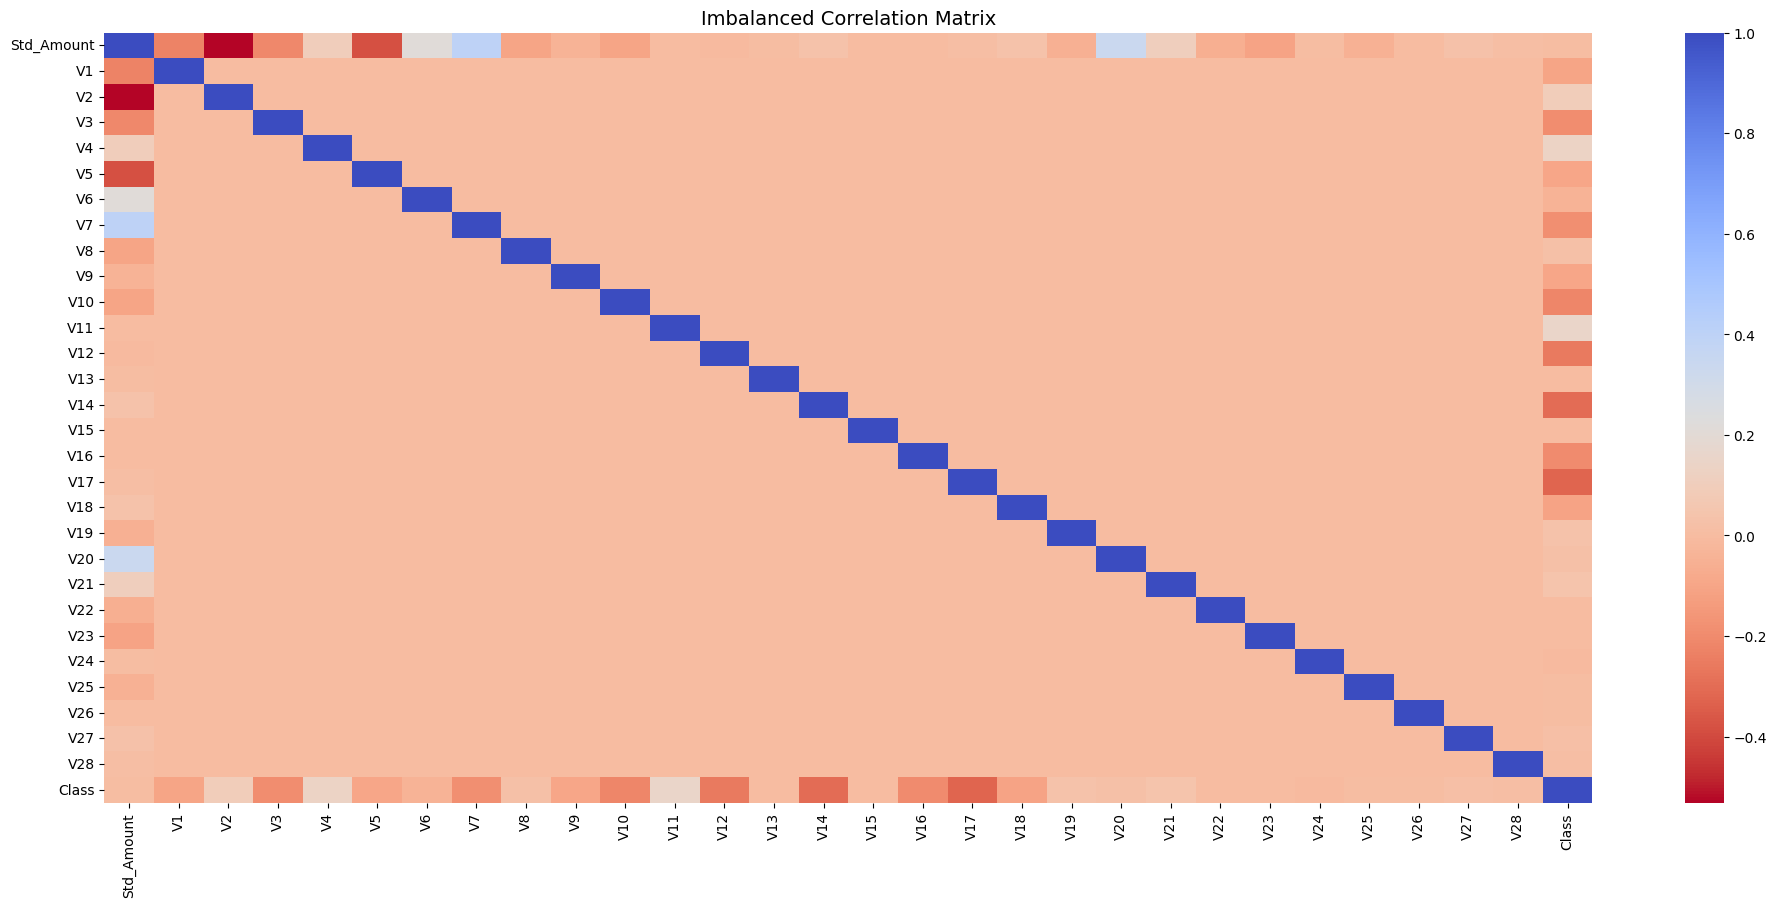

In [33]:
#checking correlation between features and the likelihood of the transaction to be fraud on the unbalanced dataset
f, ax1 = plt.subplots(figsize=(24,10))

corr = creditcard_data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)

As seen, the correlations cannot be properly visualized because of the imbalance in the dataset. This is because the correlation matrix is affected by the high imbalance betwen the classes. So, lets balance our classes and then visualize the correlation matrix again.

In [34]:
#Checking number of instances for each class in the train dataset
print(Ytrain_final.value_counts())

Class
0    170554
1       329
Name: count, dtype: int64


In [35]:
#Using ADASYN for Oversampling
ada = ADASYN(sampling_strategy='minority', random_state=42)

#Oversampling is applied only on the training set
X_adasampled, Y_adasampled = ada.fit_resample(Xtrain_final, Ytrain_final)
print('Resampled dataset shape %s' % Counter(Y_adasampled))
print('Shape of X_adasampled: {}'.format(X_adasampled.shape))
print('Shape of Y_adasampled: {}'.format(Y_adasampled.shape))

Resampled dataset shape Counter({1: 170555, 0: 170554})
Shape of X_adasampled: (341109, 29)
Shape of Y_adasampled: (341109,)


In [36]:
#check the disribution of both the labels
train_label, train_count = np.unique(Y_adasampled, return_counts=True)
print('Label Distributions: \n')
print(train_count/ len(Y_adasampled))

Label Distributions: 

[0.49999853 0.50000147]


In [37]:
print(type(X_adasampled))
print(type(Y_adasampled))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


X_adasampled and Y_adasampled are the balanced train sets resulted after using OverSampling. In order to visualize a correlation matrix, they are converted to a dataframe and joined to form a single dataframe in the below series of blocks.

In [38]:
Xsm_train_df = pd.DataFrame(X_adasampled)
Xsm_train_df.columns = Xtrain.columns
Ysm_train_df = pd.DataFrame(Y_adasampled)
Ysm_train_df = Ysm_train_df.rename(columns={0: 'Class'})
print(Xsm_train_df.head())
print(Ysm_train_df.head())

   Std_Amount        V1        V2        V3        V4        V5        V6  \
0   -0.286173 -0.313555  0.586734  3.039981  2.848687 -0.158865  0.838171   
1    0.237546  1.883183 -0.640580  0.094691  0.386752 -0.859323  0.238667   
2    1.170265 -5.593796 -3.140554 -0.055757  1.539374  1.321195  1.449076   
3   -0.267729 -0.851124  0.819195  2.014788 -0.634556 -0.166583  0.779931   
4    1.369384 -1.339343  0.842304  2.210153  3.009876 -0.501056  1.506612   

         V7        V8        V9  ...       V19       V20       V21       V22  \
0 -0.305911  0.136755  1.081775  ...  0.211776  0.064667 -0.064730  0.538368   
1 -1.172713  0.238254  2.560352  ... -0.228614 -0.191241 -0.063316  0.025427   
2  0.494910 -0.187489  1.098618  ...  0.313058 -3.165442 -0.732926  1.617461   
3 -0.248282  0.440142  1.000038  ...  0.608179  0.309633  0.133497  0.615617   
4  0.044767  0.574622 -0.545759  ...  1.033634  0.245178 -0.188658 -0.159114   

        V23       V24       V25       V26       V27     

In [39]:
#Merging the Xsm_train_df and Ysm_train_df based on the index values to get a single dataframe in order to visualize a correlation matrix
new_df= pd.merge(Xsm_train_df, Ysm_train_df, how='inner', left_index=True, right_index=True)
new_df.head()

Std_Amount        V1        V2        V3        V4        V5        V6  \
0   -0.286173 -0.313555  0.586734  3.039981  2.848687 -0.158865  0.838171   
1    0.237546  1.883183 -0.640580  0.094691  0.386752 -0.859323  0.238667   
2    1.170265 -5.593796 -3.140554 -0.055757  1.539374  1.321195  1.449076   
3   -0.267729 -0.851124  0.819195  2.014788 -0.634556 -0.166583  0.779931   
4    1.369384 -1.339343  0.842304  2.210153  3.009876 -0.501056  1.506612   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0 -0.305911  0.136755  1.081775  ...  0.064667 -0.064730  0.538368  0.017643   
1 -1.172713  0.238254  2.560352  ... -0.191241 -0.063316  0.025427  0.346800   
2  0.494910 -0.187489  1.098618  ... -3.165442 -0.732926  1.617461  1.182141   
3 -0.248282  0.440142  1.000038  ...  0.309633  0.133497  0.615617 -0.475375   
4  0.044767  0.574622 -0.545759  ...  0.245178 -0.188658 -0.159114 -0.241138   

        V24       V25       V26       V27       V28  Class  
0  0.514390 -0.970922 -0.131954  0.072962 -0.014056      0  
1  0.700140 -0.686270  0.387537 -0.060475 -0.044121      0  
2 -1.534997  0.203254 -0.308358 -0.982457 -0.584698      0  
3  0.010686  0.582486 -0.302416  0.486000  0.209563      0  
4 -0.402550  0.057283  0.231537  0.067849 -0.249524      0  

[5 rows x 30 columns]

Hence, the data frames Xsm_train_df and Ysm_train_df are merged to form a new dataframe 'new_df', with 30 attributes in total comprising of 'Std_Amount', 'V1-V28' from Xsm_train_df and 'Class' from Ysm_train_df.

Text(0.5, 1.0, 'Balanced Correlation Matrix')

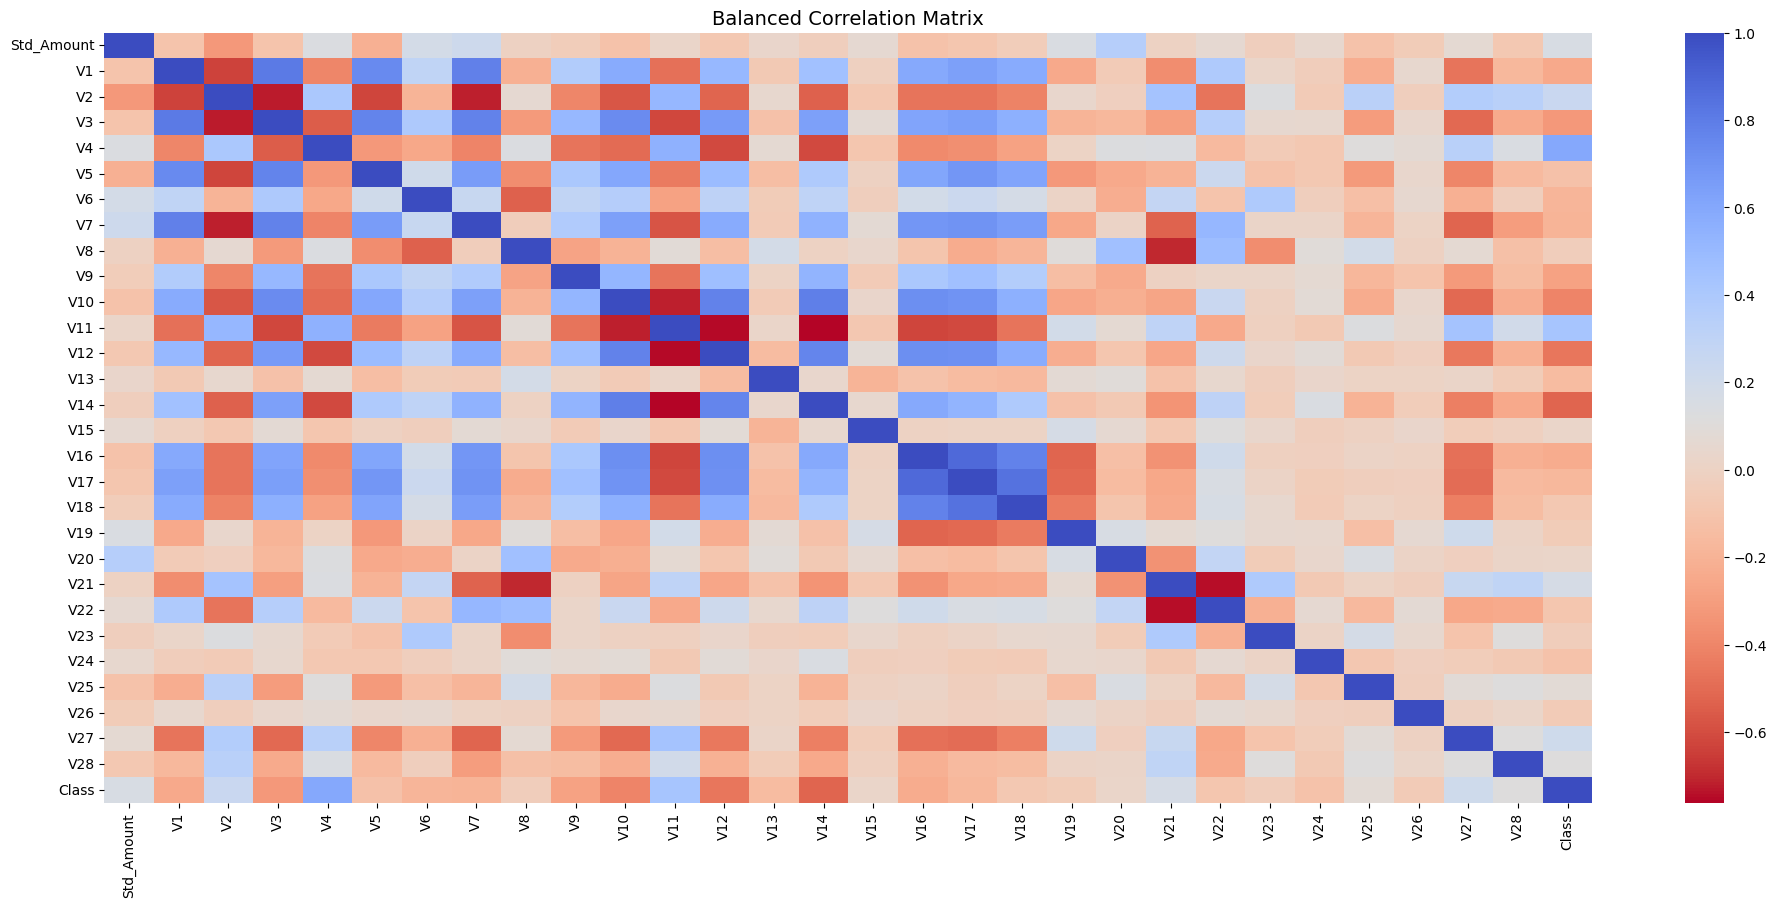

In [40]:
#checking correlation between features on the balanced dataset
f, ax1 = plt.subplots(figsize=(24,10))

corr = new_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Balanced Correlation Matrix", fontsize=14)

Negative and Positive Correlations can be seen in the matrix above:

   1.Features, V14, V12, V10 and V3 show negative correlation towards the 'Class', As, lower are these values, more likely the transaction is Fraud.
   
   2.Features V4, V11, V2 and V19 show positive correlation. As, higher are these values, more likely the transaction is Fraud.

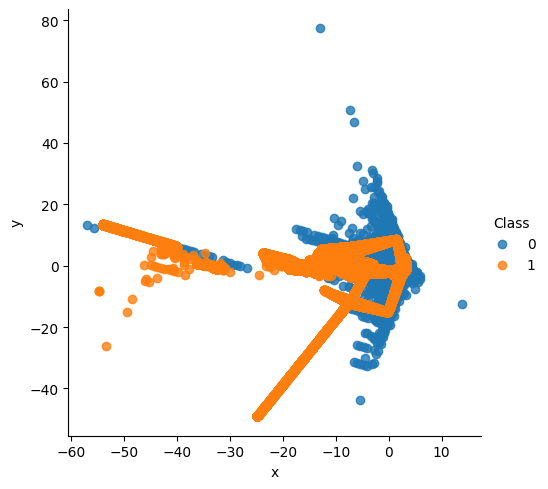

In [41]:
#visualizing balanced train dataset
X_df= pd.DataFrame(X_adasampled)
Y_df= pd.DataFrame(Y_adasampled)
Y_df=Y_df.rename(columns={0: 'Class'})
train_2d= pd.DataFrame(pca.fit_transform(X_df.iloc[:,0:29]))
train_2d= pd.concat([train_2d, Y_df], axis=1)
train_2d.columns= ['x', 'y', 'Class']
sns.lmplot(x='x', y='y', data=train_2d, fit_reg=False, hue='Class')

The above plot gives a visual representation of the balanced dataset. As seen, the data is not linearly separable. Hence, a Multi-Layer Perceptron is trained on this data, in order to predict the data as 'fraud' or 'genuine'. For the training of the Multi-layer perceptron, many parameters need to be tuned, thus a Grid-Search is used for this purpose. The Grid-Search is performed on the subset of the data, as it takes a lot of time to run. The following blocks create a subset of the dataset using random undersampling used only for this purpose.

In [42]:
#An undersampled dataset is created to tune the parameters using Grid-Search
Ytrain_df = pd.DataFrame(Ytrain_final)
Ytrain_df = Ytrain_df.rename(columns={0: 'Class'})
Train_set= pd.merge(Xtrain_final, Ytrain_df, how='inner', left_index=True, right_index=True)
Train_set.head()

Std_Amount        V1        V2        V3        V4        V5  \
14162    -0.286173 -0.313555  0.586734  3.039981  2.848687 -0.158865   
152802    0.237546  1.883183 -0.640580  0.094691  0.386752 -0.859323   
227171    1.170265 -5.593796 -3.140554 -0.055757  1.539374  1.321195   
217316   -0.267729 -0.851124  0.819195  2.014788 -0.634556 -0.166583   
80544     1.369384 -1.339343  0.842304  2.210153  3.009876 -0.501056   

              V6        V7        V8        V9  ...       V20       V21  \
14162   0.838171 -0.305911  0.136755  1.081775  ...  0.064667 -0.064730   
152802  0.238667 -1.172713  0.238254  2.560352  ... -0.191241 -0.063316   
227171  1.449076  0.494910 -0.187489  1.098618  ... -3.165442 -0.732926   
217316  0.779931 -0.248282  0.440142  1.000038  ...  0.309633  0.133497   
80544   1.506612  0.044767  0.574622 -0.545759  ...  0.245178 -0.188658   

             V22       V23       V24       V25       V26       V27       V28  \
14162   0.538368  0.017643  0.514390 -0.970922 -0.131954  0.072962 -0.014056   
152802  0.025427  0.346800  0.700140 -0.686270  0.387537 -0.060475 -0.044121   
227171  1.617461  1.182141 -1.534997  0.203254 -0.308358 -0.982457 -0.584698   
217316  0.615617 -0.475375  0.010686  0.582486 -0.302416  0.486000  0.209563   
80544  -0.159114 -0.241138 -0.402550  0.057283  0.231537  0.067849 -0.249524   

        Class  
14162       0  
152802      0  
227171      0  
217316      0  
80544       0  

[5 rows x 30 columns]

In [43]:
Train_set.shape

(170883, 30)

In [44]:
#Length of Frauds
length_frauds=len(Train_set[Train_set.Class==1])
length_frauds

329

In [45]:
#Taking only Frauds in a dataframe
fraud_df= Train_set.loc[Train_set['Class'] == 1]
fraud_df.head()

Std_Amount        V1        V2         V3         V4        V5  \
143188   -0.279466 -3.003459  2.096150  -0.487030   3.069453 -1.774329   
86155     1.110878 -2.756007  0.683821  -1.390169   1.501887 -1.165614   
9487     -0.293440 -4.153014  8.204797 -15.031714  10.330100 -3.994426   
163586    0.600852  0.949241  1.333519  -4.855402   1.835006 -1.053245   
223578   -0.183050 -5.256434  0.364541  -5.412085   2.400031  0.697301   

              V6         V7        V8        V9  ...       V20       V21  \
143188  0.251804  -4.328776 -2.425478 -0.985222  ...  0.692537  0.163967   
86155  -0.131207  -1.478741 -0.246922 -0.100523  ... -0.106945  0.320474   
9487   -3.250013 -10.415698  4.620804 -5.711248  ...  1.412625  1.976988   
163586 -2.562826  -2.286986  0.260906 -0.895366  ...  0.424608  0.306598   
223578 -1.998755  -5.835532 -0.887739 -2.828287  ... -0.403685 -0.648259   

             V22       V23       V24       V25       V26       V27       V28  \
143188  1.245648 -0.269241  0.537102 -0.220757 -0.059555  0.460710 -0.033551   
86155   0.611027  0.174864 -0.502151 -0.174713  1.179242 -1.166315  0.821215   
9487    0.256510  0.485908 -1.198821 -0.526567  0.634874  1.627209  0.723235   
163586 -0.854627  0.101177 -0.281497  0.024444 -0.107944  0.625289  0.315677   
223578  0.511285 -1.110045  0.178987  0.220235 -0.699809  0.580487 -0.173630   

        Class  
143188      1  
86155       1  
9487        1  
163586      1  
223578      1  

[5 rows x 30 columns]

In [46]:
#Taking only Non-frauds
non_fraud_df= Train_set.loc[Train_set['Class'] == 0]
#Randomly select the same number of records as the Frauds
non_frauds=non_fraud_df.sample(n=length_frauds)
non_frauds.shape

(329, 30)

In [47]:
#Appending both Frauds and Non-Frauds
undersampled_df = pd.concat([fraud_df, non_frauds], axis=0)
#Randomly shuffling all the instances
undersampled_df = sklearn.utils.shuffle(undersampled_df)
undersampled_df.head()

Std_Amount         V1        V2         V3        V4         V5  \
44223     1.647453 -19.139733  9.286847 -20.134992  7.818673 -15.652208   
111535   -0.173968  -0.626154  0.321326   0.204686 -2.182811   0.381546   
20604     0.250122  -0.841730 -0.247266   2.130749 -1.912614  -0.539291   
119714    0.111088  -0.734303  0.435519  -0.530866 -0.471120   0.643214   
211480   -0.293579   2.040313  0.187328  -1.482426  0.536501   0.180158   

              V6         V7        V8        V9  ...       V20       V21  \
44223  -1.668348 -21.340478  0.641900 -8.550110  ...  0.427203 -2.182692   
111535  0.457209  -0.080921  0.668656 -1.676194  ... -0.641067 -0.764394   
20604   0.523953  -0.499881  0.433435 -1.050647  ... -0.067001  0.571139   
119714  0.713832  -1.234572 -2.551412 -2.057724  ...  0.864536 -1.004877   
211480 -1.172647   0.207348 -0.279291  0.432450  ... -0.163124 -0.329179   

             V22       V23       V24       V25       V26       V27       V28  \
44223   0.520543 -0.760556  0.662767 -0.948454  0.121796 -3.381843 -1.256524   
111535 -2.073417  0.143133 -1.795437 -0.793719  0.417549 -0.069701  0.033998   
20604   1.488567 -0.234105 -0.261496 -0.153173 -0.168503  0.018547  0.088148   
119714  1.150354 -0.152555 -1.386745  0.004716  0.219146 -0.058257  0.158048   
211480 -0.835034  0.402170  1.056811 -0.320794  0.139167 -0.060740 -0.024982   

        Class  
44223       1  
111535      0  
20604       0  
119714      1  
211480      0  

[5 rows x 30 columns]

In [48]:
#Separating labels from the other features
X_undersample = undersampled_df.drop('Class', axis=1)
Y_undersample = undersampled_df['Class']
print(X_undersample.shape)
print(Y_undersample.shape)
X_undersample.head()

(658, 29)
(658,)


Std_Amount         V1        V2         V3        V4         V5  \
44223     1.647453 -19.139733  9.286847 -20.134992  7.818673 -15.652208   
111535   -0.173968  -0.626154  0.321326   0.204686 -2.182811   0.381546   
20604     0.250122  -0.841730 -0.247266   2.130749 -1.912614  -0.539291   
119714    0.111088  -0.734303  0.435519  -0.530866 -0.471120   0.643214   
211480   -0.293579   2.040313  0.187328  -1.482426  0.536501   0.180158   

              V6         V7        V8        V9  ...       V19       V20  \
44223  -1.668348 -21.340478  0.641900 -8.550110  ...  3.326758  0.427203   
111535  0.457209  -0.080921  0.668656 -1.676194  ... -0.475463 -0.641067   
20604   0.523953  -0.499881  0.433435 -1.050647  ... -0.733888 -0.067001   
119714  0.713832  -1.234572 -2.551412 -2.057724  ...  2.502027  0.864536   
211480 -1.172647   0.207348 -0.279291  0.432450  ... -0.142465 -0.163124   

             V21       V22       V23       V24       V25       V26       V27  \
44223  -2.182692  0.520543 -0.760556  0.662767 -0.948454  0.121796 -3.381843   
111535 -0.764394 -2.073417  0.143133 -1.795437 -0.793719  0.417549 -0.069701   
20604   0.571139  1.488567 -0.234105 -0.261496 -0.153173 -0.168503  0.018547   
119714 -1.004877  1.150354 -0.152555 -1.386745  0.004716  0.219146 -0.058257   
211480 -0.329179 -0.835034  0.402170  1.056811 -0.320794  0.139167 -0.060740   

             V28  
44223  -1.256524  
111535  0.033998  
20604   0.088148  
119714  0.158048  
211480 -0.024982  

[5 rows x 29 columns]

In [49]:
#Converting undersampled train sets in numpy arrays
X_us_arr= X_undersample.values
Y_us_arr= Y_undersample.values

In [50]:
#Converting test and validation dataframes in numpy arrays
Xval_arr=Xval.values
Yval_arr=Yval.values
Xtest_arr=Xtest.values
Ytest_arr=Ytest.values

## Model Development (Supervised)


## 1. Baseline Model (Logistic Regression)

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56864
           1       0.02      0.95      0.04        98

    accuracy                           0.92     56962
   macro avg       0.51      0.93      0.50     56962
weighted avg       1.00      0.92      0.95     56962



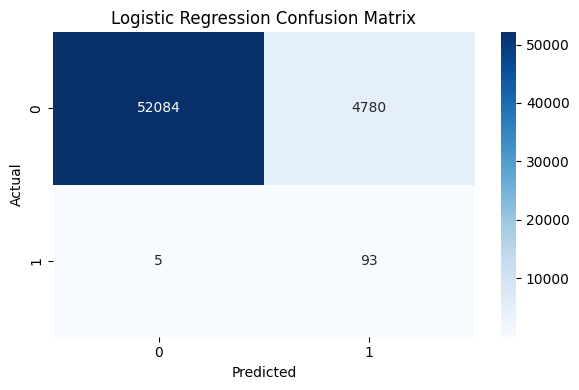

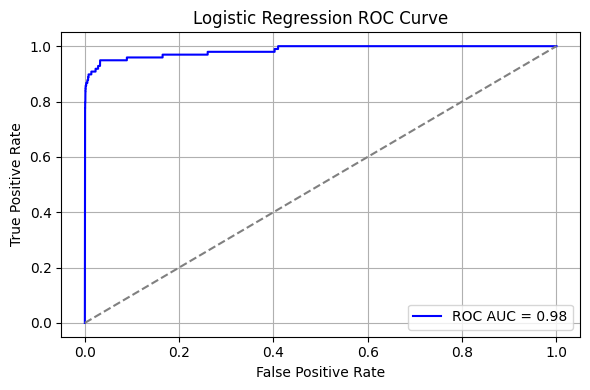

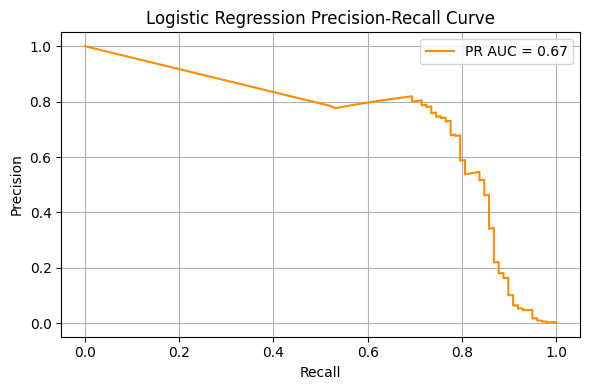

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc,precision_recall_curve, average_precision_score
# Train on ADASYN-resampled data
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_adasampled, Y_adasampled)

# Evaluate on test set
y_pred_lr = lr.predict(Xtest)
y_probs_lr = lr.predict_proba(Xtest)[:, 1] 

# Classification Report
print("Logistic Regression Performance:")
print(classification_report(Ytest, y_pred_lr))

# Confusion Matrix
cm = confusion_matrix(Ytest, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC-AUC Curve
fpr, tpr, _ = roc_curve(Ytest, y_probs_lr)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# PR-AUC Curve
precision, recall, _ = precision_recall_curve(Ytest, y_probs_lr)
pr_auc = average_precision_score(Ytest, y_probs_lr)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}', color='darkorange')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Logistic Regression Precision-Recall Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Test Set Size: 56,962 samples

Class Distribution:

1.Class 0 (Non-Fraud): 56,864

2.Class 1 (Fraud): 98



Interpretation of Logistic Regression Performance

The logistic regression model was evaluated on a highly imbalanced dataset, with a large majority of non-fraudulent (class 0) transactions and a small minority of fraudulent (class 1) cases. The classification performance metrics are summarized below:

Class 0 (Non-Fraud):

Precision: 1.00 — The model is highly confident in predicting non-fraudulent cases, with almost no false positives.

Recall: 0.92 — It correctly identifies 92% of actual non-fraud cases, with some misclassified as fraud.

F1-Score: 0.96 — The harmonic mean of precision and recall is high, indicating robust performance for the majority class.

Class 1 (Fraud):

Precision: 0.02 — Only 2% of the transactions predicted as fraudulent are truly fraud. This indicates a high number of false positives.

Recall: 0.95 — The model successfully detects 95% of actual fraud cases, which is a strong result in terms of identifying rare but critical instances.

F1-Score: 0.04 — The low precision brings down the F1-score significantly, suggesting poor overall performance in fraud prediction.

Overall Accuracy: 92%
While the model appears accurate overall, this metric is misleading due to class imbalance — over 99.8% of the data are non-fraudulent. A high accuracy is expected even with poor fraud detection.

Macro Average:

Precision: 0.51, Recall: 0.93, F1-Score: 0.50
These reflect the average performance across both classes without considering class imbalance. While recall remains high, precision and F1 are severely impacted by the poor fraud class performance.

Weighted Average:

Precision: 1.00, Recall: 0.92, F1-Score: 0.95
These are skewed toward the majority class and hence do not represent the true model performance on fraud detection.



Conclusion:

The logistic regression model exhibits strong recall for fraudulent transactions (95%), indicating its potential for detecting rare fraud events. However, the extremely low precision (2%) results in many false alarms, reducing its reliability in real-world deployment.

## 2.  XGBoost Model

XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.96      0.90        98

    accuracy                           1.00     56962
   macro avg       0.92      0.98      0.95     56962
weighted avg       1.00      1.00      1.00     56962



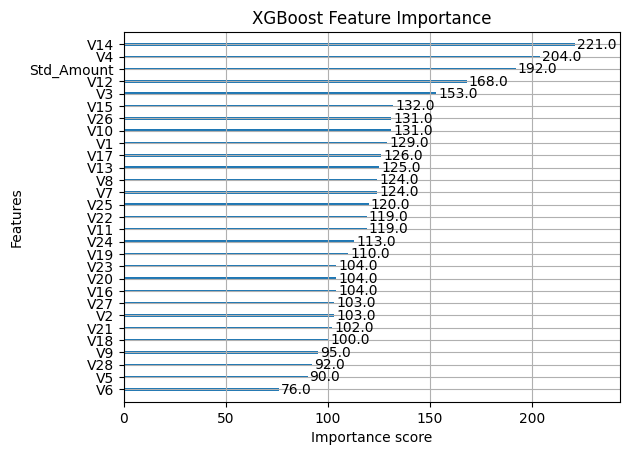

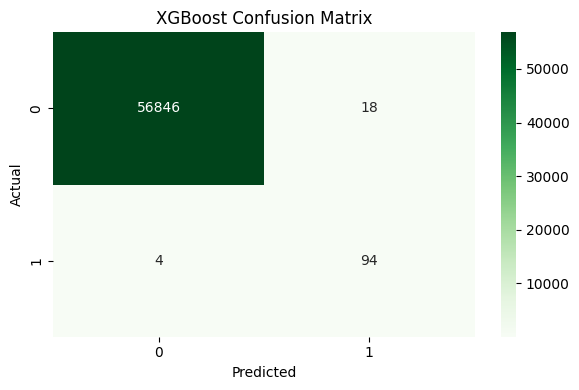

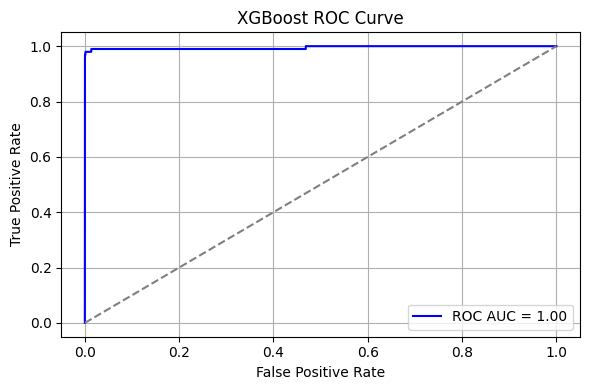

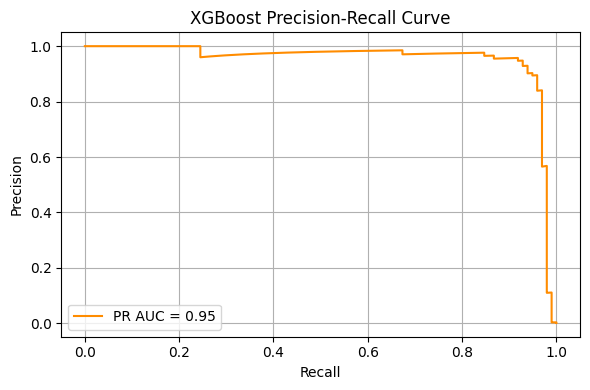

In [53]:
import xgboost as xgb

# Train XGBoost on resampled data
xgb_model = xgb.XGBClassifier(
    scale_pos_weight=len(Y_adasampled[Y_adasampled==0])/len(Y_adasampled[Y_adasampled==1]),
    eval_metric='logloss'
)
xgb_model.fit(X_adasampled, Y_adasampled)

# Evaluate
y_pred_xgb = xgb_model.predict(Xtest)
y_probs_xgb = xgb_model.predict_proba(Xtest)[:, 1]  # probabilities for class 1 (fraud)

# Classification Report
print("XGBoost Performance:")
print(classification_report(Ytest, y_pred_xgb))

# Feature Importance
xgb.plot_importance(xgb_model)
plt.title("XGBoost Feature Importance")
plt.show()

#Confusion matrix
cm = confusion_matrix(Ytest, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

#ROC-AUC Curve
fpr, tpr, _ = roc_curve(Ytest, y_probs_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#PR-AUC Curve 
precision, recall, _ = precision_recall_curve(Ytest, y_probs_xgb)
pr_auc = average_precision_score(Ytest, y_probs_xgb)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}', color='darkorange')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("XGBoost Precision-Recall Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Overall Metrics
Accuracy: 1.00 (100%)

Macro Avg F1-Score: 0.95

Weighted Avg F1-Score: 1.00

These results suggest your XGBoost model is very strong, especially at detecting fraud

Important features are-:

1.v14

2.v4

3.std_amount

Interpretation of XGBoost Performance

The XGBoost classifier demonstrates exceptionally strong performance on the fraud detection task, as shown in the classification report:

Class 0 (Non-Fraud):

Precision: 1.00 — All predicted non-fraud cases are indeed non-fraudulent; zero false positives.

Recall: 1.00 — All actual non-fraud transactions are correctly identified.

F1-Score: 1.00 — Perfect balance of precision and recall, indicating excellent handling of the majority class.

Class 1 (Fraud):

Precision: 0.84 — 84% of the predicted fraudulent cases are actually fraud. This indicates low false positive rate, which is vital in financial applications.

Recall: 0.96 — The model correctly identifies 96% of actual fraudulent cases, showcasing strong sensitivity.

F1-Score: 0.90 — A high harmonic mean of precision and recall, representing well-balanced fraud detection.

Overall Accuracy: 1.00 (100%)
The model achieves near-perfect accuracy on the test data. This is not misleading in this case, since it also performs very well on the minority fraud class.

Macro Average:

Precision: 0.92, Recall: 0.98, F1-Score: 0.95
These averages treat both classes equally and reflect the model’s excellent generalization ability across class distributions.

Weighted Average:

Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Dominated by class 0 but still remains perfect, showing that XGBoost performs strongly even on imbalanced data.



Conclusion:

The XGBoost model offers outstanding performance with high recall (96%) and precision (84%) for fraud detection. This balance ensures both low false negatives (missed frauds) and low false positives (false alarms), making the model highly suitable for real-world fraud prevention systems.

## Code for Basic Hyperparameter Tuning of XGBoost

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, accuracy_score
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Define XGBoost classifier with class imbalance handling
xgb_clf = xgb.XGBClassifier(
    scale_pos_weight=len(Y_adasampled[Y_adasampled==0]) / len(Y_adasampled[Y_adasampled==1]),
    eval_metric='logloss',
    use_label_encoder=False
)

# Create scorer dict for recall and accuracy
scorers = {
    'recall': make_scorer(recall_score),
    'accuracy': make_scorer(accuracy_score)
}

# Grid Search with 3-fold CV, optimize for recall first
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring=scorers,
    refit='recall',  # You can change this to 'accuracy' if needed
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the model on resampled data
grid_search.fit(X_adasampled, Y_adasampled)

# Best model
best_model = grid_search.best_estimator_

# Evaluate
y_pred_best = best_model.predict(Xtest)
print("Tuned XGBoost Performance:")
print(classification_report(Ytest, y_pred_best))

# Show best parameters
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\Vishal Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:13:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Tuned XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.30      0.97      0.46        98

    accuracy                           1.00     56962
   macro avg       0.65      0.98      0.73     56962
weighted avg       1.00      1.00      1.00     56962

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, accuracy_score
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Define XGBoost classifier with class imbalance handling
xgb_clf = xgb.XGBClassifier(
    scale_pos_weight=len(Y_adasampled[Y_adasampled==0]) / len(Y_adasampled[Y_adasampled==1]),
    eval_metric='logloss',
    use_label_encoder=False
)

# Create scorer dict for recall and accuracy
scorers = {
    'recall': make_scorer(recall_score),
    'accuracy': make_scorer(accuracy_score)
}

# Grid Search with 3-fold CV, optimize for recall first
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring=scorers,
    refit='accuracy', 
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the model on resampled data
grid_search.fit(X_adasampled, Y_adasampled)

# Best model
best_model = grid_search.best_estimator_

# Evaluate
y_pred_best = best_model.predict(Xtest)
print("Tuned XGBoost Performance:")
print(classification_report(Ytest, y_pred_best))

# Show best parameters
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\Vishal Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:19:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Tuned XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.30      0.97      0.46        98

    accuracy                           1.00     56962
   macro avg       0.65      0.98      0.73     56962
weighted avg       1.00      1.00      1.00     56962

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


## Model Development (Unsupervised)

## 1. Isolation Forest

Isolation Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.21      0.16      0.18        98

    accuracy                           1.00     56962
   macro avg       0.61      0.58      0.59     56962
weighted avg       1.00      1.00      1.00     56962



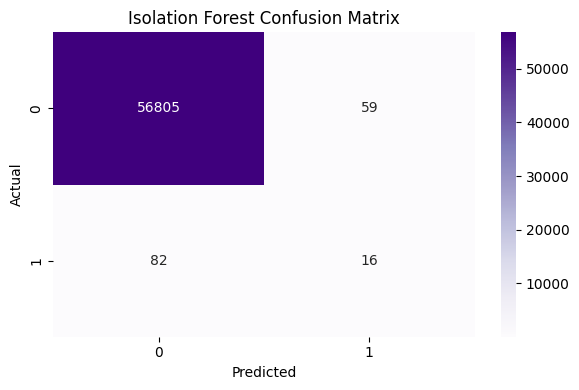

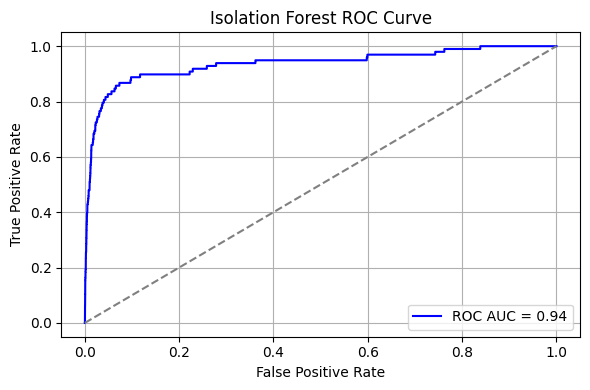

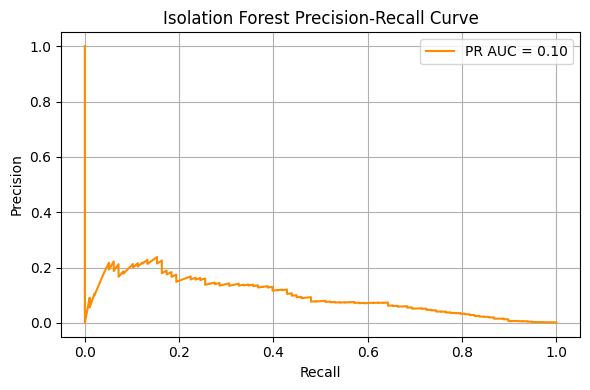

Number of anomalies detected: 75

Sample of detected anomalies (first 5):
        Std_Amount         V1         V2         V3        V4         V5  \
117639   40.461678 -20.358393 -21.292757 -10.060800  9.371024 -13.604435   
102446   -0.293440 -13.192671  12.785971  -9.906650  3.320337  -4.801176   
12325     0.950045  -7.264561   6.577125 -12.138715  5.865147  -6.885913   
279286    1.089918  -5.938225   2.791712  -4.243521 -1.483605  -1.245294   
77814     4.139593 -22.435671 -21.510079  -3.711944  6.479684   2.177843   

              V6         V7         V8        V9  ...        V21       V22  \
117639  9.044467  14.110956  -0.729836 -1.028627  ...  -1.631951 -0.167927   
102446  5.760059 -18.750889 -37.353443 -0.391540  ...  27.202839 -8.887017   
12325  -3.521773 -10.061374   5.190588 -3.171865  ...   1.519657 -0.578047   
279286  5.364900 -10.630713 -22.739755 -2.566870  ... -10.829076  6.090514   
77814  -0.276111   3.935704  -4.871645  5.305156  ...  -6.245874  1.770421   



In [56]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Initialize Isolation Forest
# Contamination is set to approximate the fraud rate in the dataset (~0.0017 from earlier analysis)
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.0017,  # Expected proportion of anomalies (frauds)
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Train Isolation Forest on the training data (Xtrain_final)
# We use only features, ignoring labels since this is unsupervised
iso_forest.fit(Xtrain_final)

# Predict anomalies on the test set
# Isolation Forest returns -1 for anomalies (frauds) and 1 for inliers (non-frauds)
y_pred_iso = iso_forest.predict(Xtest)

# Convert predictions to match classification format: -1 (anomaly) -> 1 (fraud), 1 (inlier) -> 0 (non-fraud)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

# Get anomaly scores (decision function) for ROC/PR curves
# Lower scores indicate more anomalous (fraud-like) instances
y_scores_iso = -iso_forest.decision_function(Xtest)  # Negate to make higher scores indicate fraud

# Classification Report
print("Isolation Forest Performance:")
print(classification_report(Ytest, y_pred_iso))

# Confusion Matrix
cm_iso = confusion_matrix(Ytest, y_pred_iso)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_iso, annot=True, fmt='d', cmap='Purples', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Isolation Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC-AUC Curve
fpr_iso, tpr_iso, _ = roc_curve(Ytest, y_scores_iso)
roc_auc_iso = auc(fpr_iso, tpr_iso)

plt.figure(figsize=(6, 4))
plt.plot(fpr_iso, tpr_iso, label=f'ROC AUC = {roc_auc_iso:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Isolation Forest ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# PR-AUC Curve
precision_iso, recall_iso, _ = precision_recall_curve(Ytest, y_scores_iso)
pr_auc_iso = average_precision_score(Ytest, y_scores_iso)

plt.figure(figsize=(6, 4))
plt.plot(recall_iso, precision_iso, label=f'PR AUC = {pr_auc_iso:.2f}', color='darkorange')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Isolation Forest Precision-Recall Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Sample Anomalies Detected
# Identify indices of predicted anomalies (frauds) in the test set
anomaly_indices = np.where(y_pred_iso == 1)[0]
print(f"Number of anomalies detected: {len(anomaly_indices)}")

# Display a sample of detected anomalies (first 5, if any)
if len(anomaly_indices) > 0:
    print("\nSample of detected anomalies (first 5):")
    anomaly_samples = Xtest.iloc[anomaly_indices[:5]]
    anomaly_labels = Ytest.iloc[anomaly_indices[:5]]
    anomaly_scores = y_scores_iso[anomaly_indices[:5]]
    
    # Combine features, true labels, and scores for display
    anomaly_df = pd.DataFrame(anomaly_samples)
    anomaly_df['True_Label'] = anomaly_labels.values
    anomaly_df['Anomaly_Score'] = anomaly_scores
    print(anomaly_df)
else:
    print("No anomalies detected.")

The model’s performance shows:
1.Precision for fraud (0.21): Only 21% of transactions flagged as fraud are actually frauds, meaning there are many false positives.

2.Recall for fraud (0.16): It catches only 16% of actual frauds, missing many, which is a concern for fraud detection.

3.F1-score for fraud (0.18): A balance of precision and recall, still low, indicating overall poor performance for fraud detection.

This suggests the model struggles with imbalanced data, missing many frauds while flagging some non-frauds, which is common for unsupervised methods without labeled training.

By confusion matrix

1.True Negatives (TN) = 56805 → correctly predicted non-fraud

2.False Positives (FP) = 59 → predicted fraud but actually non-fraud

3.False Negatives (FN) = 82 → predicted non-fraud but actually fraud

4.True Positives (TP) = 16 → correctly predicted fraud

Quick Insights:

1.High ROC-AUC (0.94): This shows your model is good at ranking (separating frauds from non-frauds), but...

2.Low PR-AUC (0.10) and F1-score (0.18): These highlight the struggle in identifying true frauds due to heavy class imbalance and overlapping patterns.

3.Detected 75 anomalies, but most of them were false positives (only 16 were actually fraud).


## Tuning its hyperparameters using GridSearchCV

Keeping the contamination value as I got from the actual dataset

In [57]:
contamination = len(Ytrain_final[Ytrain_final == 1]) / len(Ytrain_final)
print(f"Contamination from training set: {contamination:.6f}")

Contamination from training set: 0.001925


In [58]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, average_precision_score

def isolation_forest_ap(estimator, X, y):
    scores = -estimator.decision_function(X)  # Negate for higher scores to indicate anomalies
    return average_precision_score(y, scores)

ap_scorer = make_scorer(isolation_forest_ap)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0]
}

iso_forest = IsolationForest(contamination=contamination, random_state=42)
grid_search = GridSearchCV(iso_forest, param_grid, scoring=ap_scorer, cv=5, n_jobs=-1)
grid_search.fit(Xtrain_final, Ytrain_final)

print(f"Best parameters: {grid_search.best_params_}")
best_iso_forest = grid_search.best_estimator_

C:\Users\Vishal Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters: {'max_samples': 0.5, 'n_estimators': 50}


## Code after fine tuning

Isolation Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.20      0.17      0.19        98

    accuracy                           1.00     56962
   macro avg       0.60      0.59      0.59     56962
weighted avg       1.00      1.00      1.00     56962



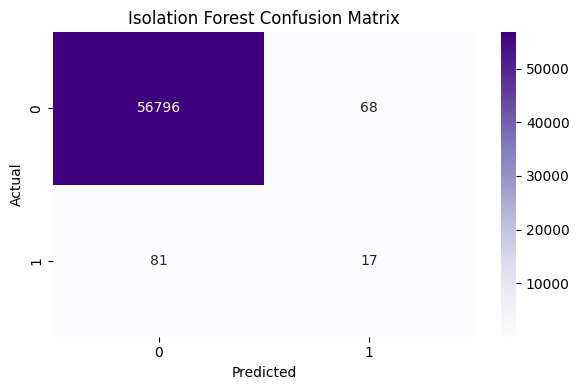

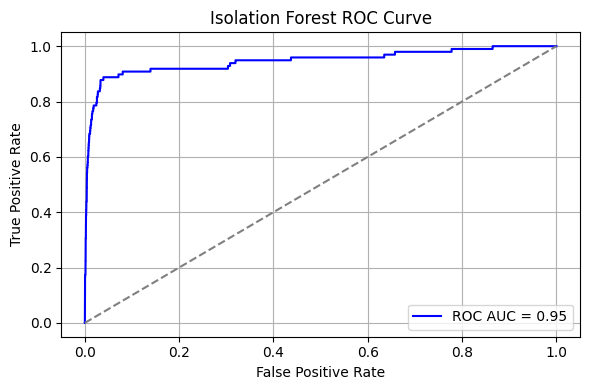

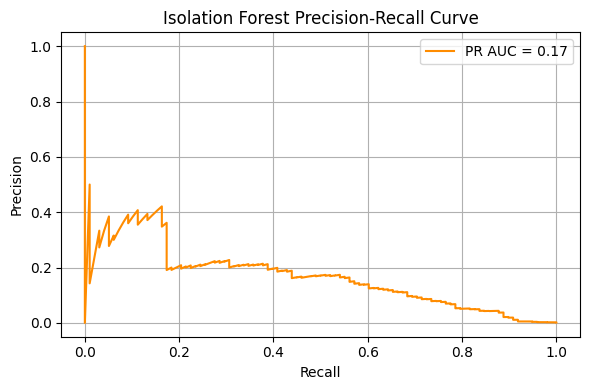

Number of anomalies detected: 85

Sample of detected anomalies (first 5):
        Std_Amount         V1         V2         V3        V4         V5  \
117639   40.461678 -20.358393 -21.292757 -10.060800  9.371024 -13.604435   
102446   -0.293440 -13.192671  12.785971  -9.906650  3.320337  -4.801176   
46086     0.382589  -6.033705   5.653157  -3.061938 -0.050921  -0.141524   
12325     0.950045  -7.264561   6.577125 -12.138715  5.865147  -6.885913   
279286    1.089918  -5.938225   2.791712  -4.243521 -1.483605  -1.245294   

              V6         V7         V8        V9  ...        V21       V22  \
117639  9.044467  14.110956  -0.729836 -1.028627  ...  -1.631951 -0.167927   
102446  5.760059 -18.750889 -37.353443 -0.391540  ...  27.202839 -8.887017   
46086   8.933762 -11.783311 -24.483109 -3.500322  ... -12.700635  3.283477   
12325  -3.521773 -10.061374   5.190588 -3.171865  ...   1.519657 -0.578047   
279286  5.364900 -10.630713 -22.739755 -2.566870  ... -10.829076  6.090514   



In [59]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Initialize Isolation Forest with tuned hyperparameters
iso_forest = IsolationForest(
    n_estimators=50,  # Updated from tuning
    max_samples=0.5,  # Updated from tuning
    contamination=0.0017,  # Expected proportion of anomalies (frauds)
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Train Isolation Forest on the training data (Xtrain_final)
iso_forest.fit(Xtrain_final)

# Predict anomalies on the test set
y_pred_iso = iso_forest.predict(Xtest)

# Convert predictions to match classification format: -1 (anomaly) -> 1 (fraud), 1 (inlier) -> 0 (non-fraud)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

# Get anomaly scores (decision function) for ROC/PR curves
y_scores_iso = -iso_forest.decision_function(Xtest)  # Negate to make higher scores indicate fraud

# Classification Report
print("Isolation Forest Performance:")
print(classification_report(Ytest, y_pred_iso))

# Confusion Matrix
cm_iso = confusion_matrix(Ytest, y_pred_iso)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_iso, annot=True, fmt='d', cmap='Purples', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Isolation Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC-AUC Curve
fpr_iso, tpr_iso, _ = roc_curve(Ytest, y_scores_iso)
roc_auc_iso = auc(fpr_iso, tpr_iso)

plt.figure(figsize=(6, 4))
plt.plot(fpr_iso, tpr_iso, label=f'ROC AUC = {roc_auc_iso:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Isolation Forest ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# PR-AUC Curve
precision_iso, recall_iso, _ = precision_recall_curve(Ytest, y_scores_iso)
pr_auc_iso = average_precision_score(Ytest, y_scores_iso)

plt.figure(figsize=(6, 4))
plt.plot(recall_iso, precision_iso, label=f'PR AUC = {pr_auc_iso:.2f}', color='darkorange')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Isolation Forest Precision-Recall Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Sample Anomalies Detected
anomaly_indices = np.where(y_pred_iso == 1)[0]
print(f"Number of anomalies detected: {len(anomaly_indices)}")

# Display a sample of detected anomalies (first 5, if any)
if len(anomaly_indices) > 0:
    print("\nSample of detected anomalies (first 5):")
    anomaly_samples = Xtest.iloc[anomaly_indices[:5]]
    anomaly_labels = Ytest.iloc[anomaly_indices[:5]]
    anomaly_scores = y_scores_iso[anomaly_indices[:5]]
    
    # Combine features, true labels, and scores for display
    anomaly_df = pd.DataFrame(anomaly_samples)
    anomaly_df['True_Label'] = anomaly_labels.values
    anomaly_df['Anomaly_Score'] = anomaly_scores
    print(anomaly_df)
else:
    print("No anomalies detected.")

After fine tuning ,the unsupervised model still perform poorly and no effective progress is seen. 

## Reducing the value of contamination to get good results 

Isolation Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.36      0.09      0.15        98

    accuracy                           1.00     56962
   macro avg       0.68      0.55      0.57     56962
weighted avg       1.00      1.00      1.00     56962



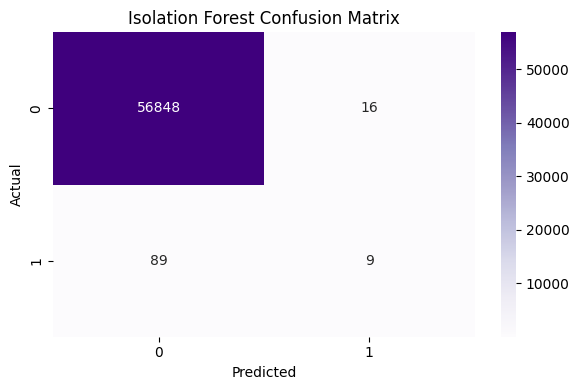

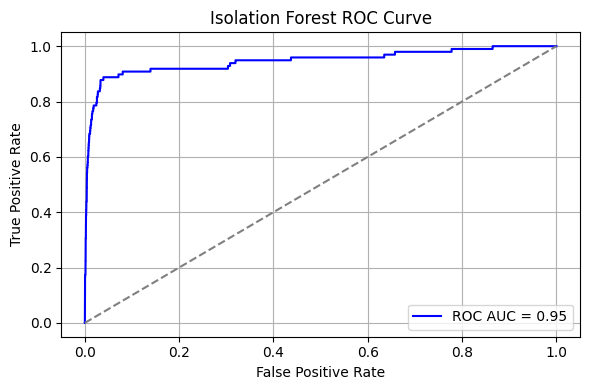

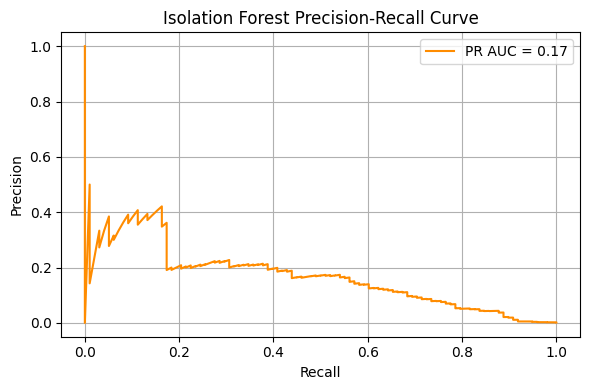

Number of anomalies detected: 25

Sample of detected anomalies (first 5):
        Std_Amount         V1         V2         V3         V4         V5  \
102446   -0.293440 -13.192671  12.785971  -9.906650   3.320337  -4.801176   
77814     4.139593 -22.435671 -21.510079  -3.711944   6.479684   2.177843   
46841   180.101027 -23.712839 -42.172688 -13.320825   9.925019 -13.945538   
52524    42.320827  -7.234663   4.013911  -3.883894  -2.686814 -11.940702   
150654   -0.307273  -3.765680   5.890735 -10.202268  10.259036  -5.611448   

              V6         V7         V8        V9  ...        V21       V22  \
102446  5.760059 -18.750889 -37.353443 -0.391540  ...  27.202839 -8.887017   
77814  -0.276111   3.935704  -4.871645  5.305156  ...  -6.245874  1.770421   
46841   5.564891  15.710644  -2.844253 -1.580725  ...   7.921600 -6.320710   
52524   8.141055   3.631227 -19.013925  2.992497  ...  13.392986 -6.129680   
150654 -3.235376 -10.632683   3.272716 -5.268905  ...   2.245606  0.54632

In [60]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Initialize Isolation Forest with tuned hyperparameters
iso_forest = IsolationForest(
    n_estimators=50,  # Updated from tuning
    max_samples=0.5,  # Updated from tuning
    contamination=0.0007,  # Expected proportion of anomalies (frauds)
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Train Isolation Forest on the training data (Xtrain_final)
iso_forest.fit(Xtrain_final)

# Predict anomalies on the test set
y_pred_iso = iso_forest.predict(Xtest)

# Convert predictions to match classification format: -1 (anomaly) -> 1 (fraud), 1 (inlier) -> 0 (non-fraud)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

# Get anomaly scores (decision function) for ROC/PR curves
y_scores_iso = -iso_forest.decision_function(Xtest)  # Negate to make higher scores indicate fraud

# Classification Report
print("Isolation Forest Performance:")
print(classification_report(Ytest, y_pred_iso))

# Confusion Matrix
cm_iso = confusion_matrix(Ytest, y_pred_iso)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_iso, annot=True, fmt='d', cmap='Purples', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Isolation Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC-AUC Curve
fpr_iso, tpr_iso, _ = roc_curve(Ytest, y_scores_iso)
roc_auc_iso = auc(fpr_iso, tpr_iso)

plt.figure(figsize=(6, 4))
plt.plot(fpr_iso, tpr_iso, label=f'ROC AUC = {roc_auc_iso:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Isolation Forest ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# PR-AUC Curve
precision_iso, recall_iso, _ = precision_recall_curve(Ytest, y_scores_iso)
pr_auc_iso = average_precision_score(Ytest, y_scores_iso)

plt.figure(figsize=(6, 4))
plt.plot(recall_iso, precision_iso, label=f'PR AUC = {pr_auc_iso:.2f}', color='darkorange')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Isolation Forest Precision-Recall Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Sample Anomalies Detected
anomaly_indices = np.where(y_pred_iso == 1)[0]
print(f"Number of anomalies detected: {len(anomaly_indices)}")

# Display a sample of detected anomalies (first 5, if any)
if len(anomaly_indices) > 0:
    print("\nSample of detected anomalies (first 5):")
    anomaly_samples = Xtest.iloc[anomaly_indices[:5]]
    anomaly_labels = Ytest.iloc[anomaly_indices[:5]]
    anomaly_scores = y_scores_iso[anomaly_indices[:5]]
    
    # Combine features, true labels, and scores for display
    anomaly_df = pd.DataFrame(anomaly_samples)
    anomaly_df['True_Label'] = anomaly_labels.values
    anomaly_df['Anomaly_Score'] = anomaly_scores
    print(anomaly_df)
else:
    print("No anomalies detected.")

1.High precision for frauds (0.36): So when the model flags a fraud, there's a 36% chance it's actually a fraud.

2.Low recall (0.09): It’s catching only ~9% of actual frauds (9 out of 98).

3.Accuracy is high (1.00) — but that's expected and not meaningful here due to class imbalance.

4.ROC AUC = 0.95: Excellent! It means the model ranks most frauds higher than non-frauds.



## Evaluate unsupervised anomaly detection models

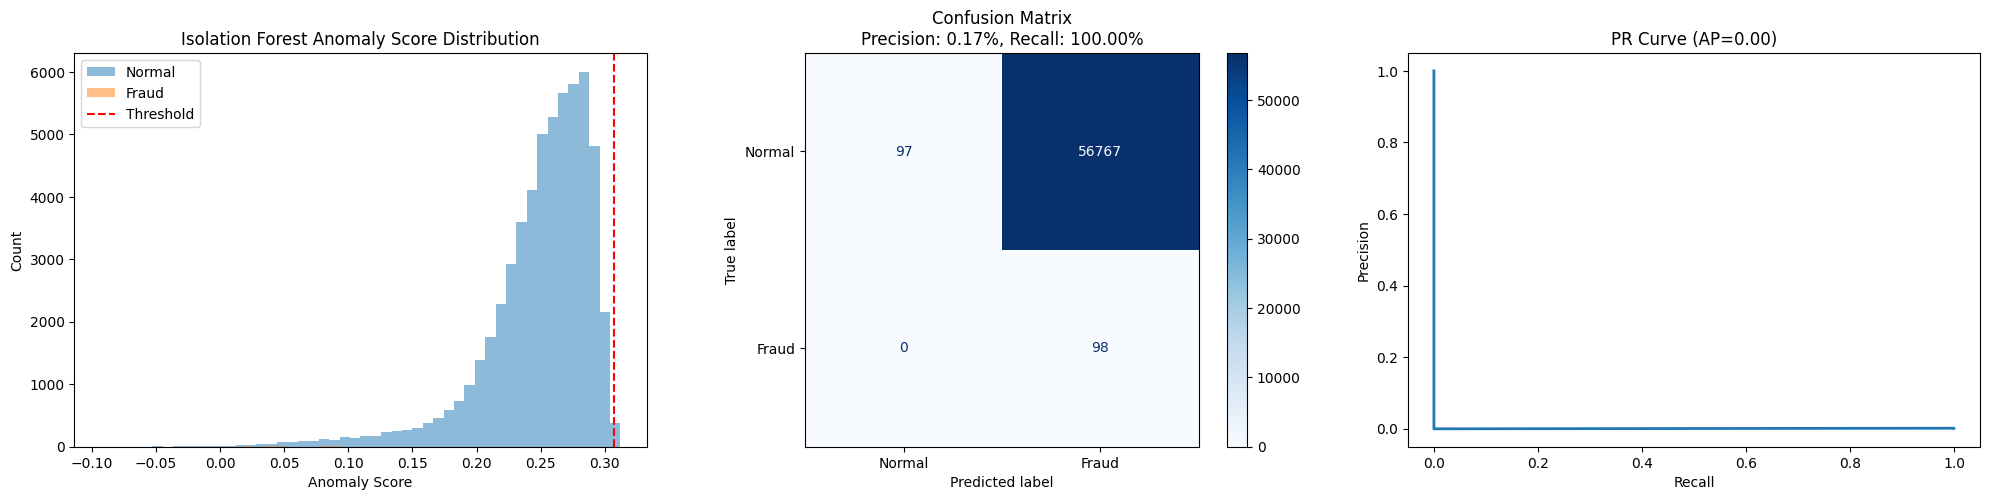


Unsupervised Model Evaluation Results:


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (precision_score, recall_score, f1_score,
                            confusion_matrix, ConfusionMatrixDisplay,
                            roc_curve, auc, precision_recall_curve)

def evaluate_unsupervised_model(model, X_test, y_test, model_name, contamination=0.0017):
    """
    Evaluate unsupervised anomaly detection model against known fraud labels
    
    Parameters:
    model: Trained unsupervised model (Isolation Forest, Autoencoder, etc.)
    X_test: Test features
    y_test: True labels (0=normal, 1=fraud)
    model_name: Name for display purposes
    contamination: Expected fraud rate (default 0.17% for credit card fraud)
    """
    # Get anomaly scores
    if hasattr(model, 'decision_function'):
        scores = model.decision_function(X_test)
    elif hasattr(model, 'predict_proba'):
        scores = model.predict_proba(X_test)[:, 1]
    else:  # For reconstruction-based models (Autoencoders)
        reconstructions = model.predict(X_test)
        scores = -np.mean(np.square(X_test - reconstructions), axis=1)
    
    # Convert scores to binary predictions using quantile threshold
    threshold = np.quantile(scores, 1 - contamination)
    y_pred = (scores > threshold).astype(int)
    
    # Align predictions with fraud labels (some models invert anomaly labels)
    if np.mean(y_pred[y_test == 1]) < 0.5:  # Check if majority of frauds are not flagged
        y_pred = 1 - y_pred  # Flip predictions if necessary
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Generate visualizations
    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    
    # 1. Score Distribution
    plt.subplot(1, 3, 1)
    plt.hist(scores[y_test == 0], bins=50, alpha=0.5, label='Normal')
    plt.hist(scores[y_test == 1], bins=50, alpha=0.5, label='Fraud')
    plt.axvline(threshold, color='r', linestyle='--', label='Threshold')
    plt.title(f'{model_name} Anomaly Score Distribution')
    plt.xlabel('Anomaly Score')
    plt.ylabel('Count')
    plt.legend()
    
    # 2. Confusion Matrix
    plt.subplot(1, 3, 2)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=['Normal', 'Fraud'])
    disp.plot(ax=plt.gca(), cmap='Blues')
    plt.title(f'Confusion Matrix\nPrecision: {precision:.2%}, Recall: {recall:.2%}')
    
    # 3. Precision-Recall Curve
    plt.subplot(1, 3, 3)
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, scores)
    plt.plot(recall_curve, precision_curve, lw=2)
    plt.fill_between(recall_curve, precision_curve, alpha=0.2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'PR Curve (AP={average_precision_score(y_test, scores):.2f})')
    
    plt.tight_layout()
    plt.show()
    
    # Return metrics
    return {
        'model': model_name,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'threshold': threshold,
        'fraud_captured': np.sum(y_pred[y_test == 1]),
        'total_fraud': np.sum(y_test),
        'false_positives': np.sum(y_pred[y_test == 0])
    }

# Example usage
results = []

# Evaluate Isolation Forest
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.0017, random_state=42)
iso_forest.fit(Xtrain_final)
results.append(evaluate_unsupervised_model(iso_forest, Xtest, Ytest, 'Isolation Forest'))


# Display results
results_df = pd.DataFrame(results)
print("\nUnsupervised Model Evaluation Results:")
display(results_df.style.format({
    'precision': '{:.2%}',
    'recall': '{:.2%}',
    'f1': '{:.2%}',
    'threshold': '{:.3f}',
    'fraud_captured': '{:.0f}',
    'total_fraud': '{:.0f}',
    'false_positives': '{:.0f}'
}))

##  Explaining sample predictions.

In [61]:
pip install lime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\Vishal Kumar\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [62]:
from lime.lime_tabular import LimeTabularExplainer

## For Supervised Models (XGBoost):

In [63]:
explainer_xgb = LimeTabularExplainer(
    training_data=Xtrain_final.values,
    feature_names=Xtrain_final.columns,
    class_names=['non-fraud', 'fraud'],
    mode='classification'
)

In [67]:
fraud_index = Ytest[Ytest == 1].index[0]
instance = Xtest.loc[fraud_index]  

In [68]:
exp = explainer_xgb.explain_instance(
    instance.values,
    xgb_model.predict_proba,
    num_features=10  # Show top 10 contributing features
)

In [69]:
exp = explainer_xgb.explain_instance(
    instance.values,
    xgb_model.predict_proba,
    num_features=10  # Show top 10 contributing features
)

In [70]:
exp.show_in_notebook()

In [73]:
exp.as_list()

[('V4 > 0.84', 0.019384868277384185),
 ('V14 <= -0.39', 0.013637211324924632),
 ('V8 <= -0.19', 0.01199744836266946),
 ('V12 <= -0.45', 0.009525977062486942),
 ('V20 <= -0.20', 0.007306382406214827),
 ('V11 > 0.84', 0.006462378983545912),
 ('-0.66 < V9 <= -0.07', 0.0057261983078323656),
 ('V2 > 0.78', -0.005205492134695754),
 ('V13 <= -0.65', 0.004986061988123779),
 ('Std_Amount <= -0.22', 0.004669165802412148)]

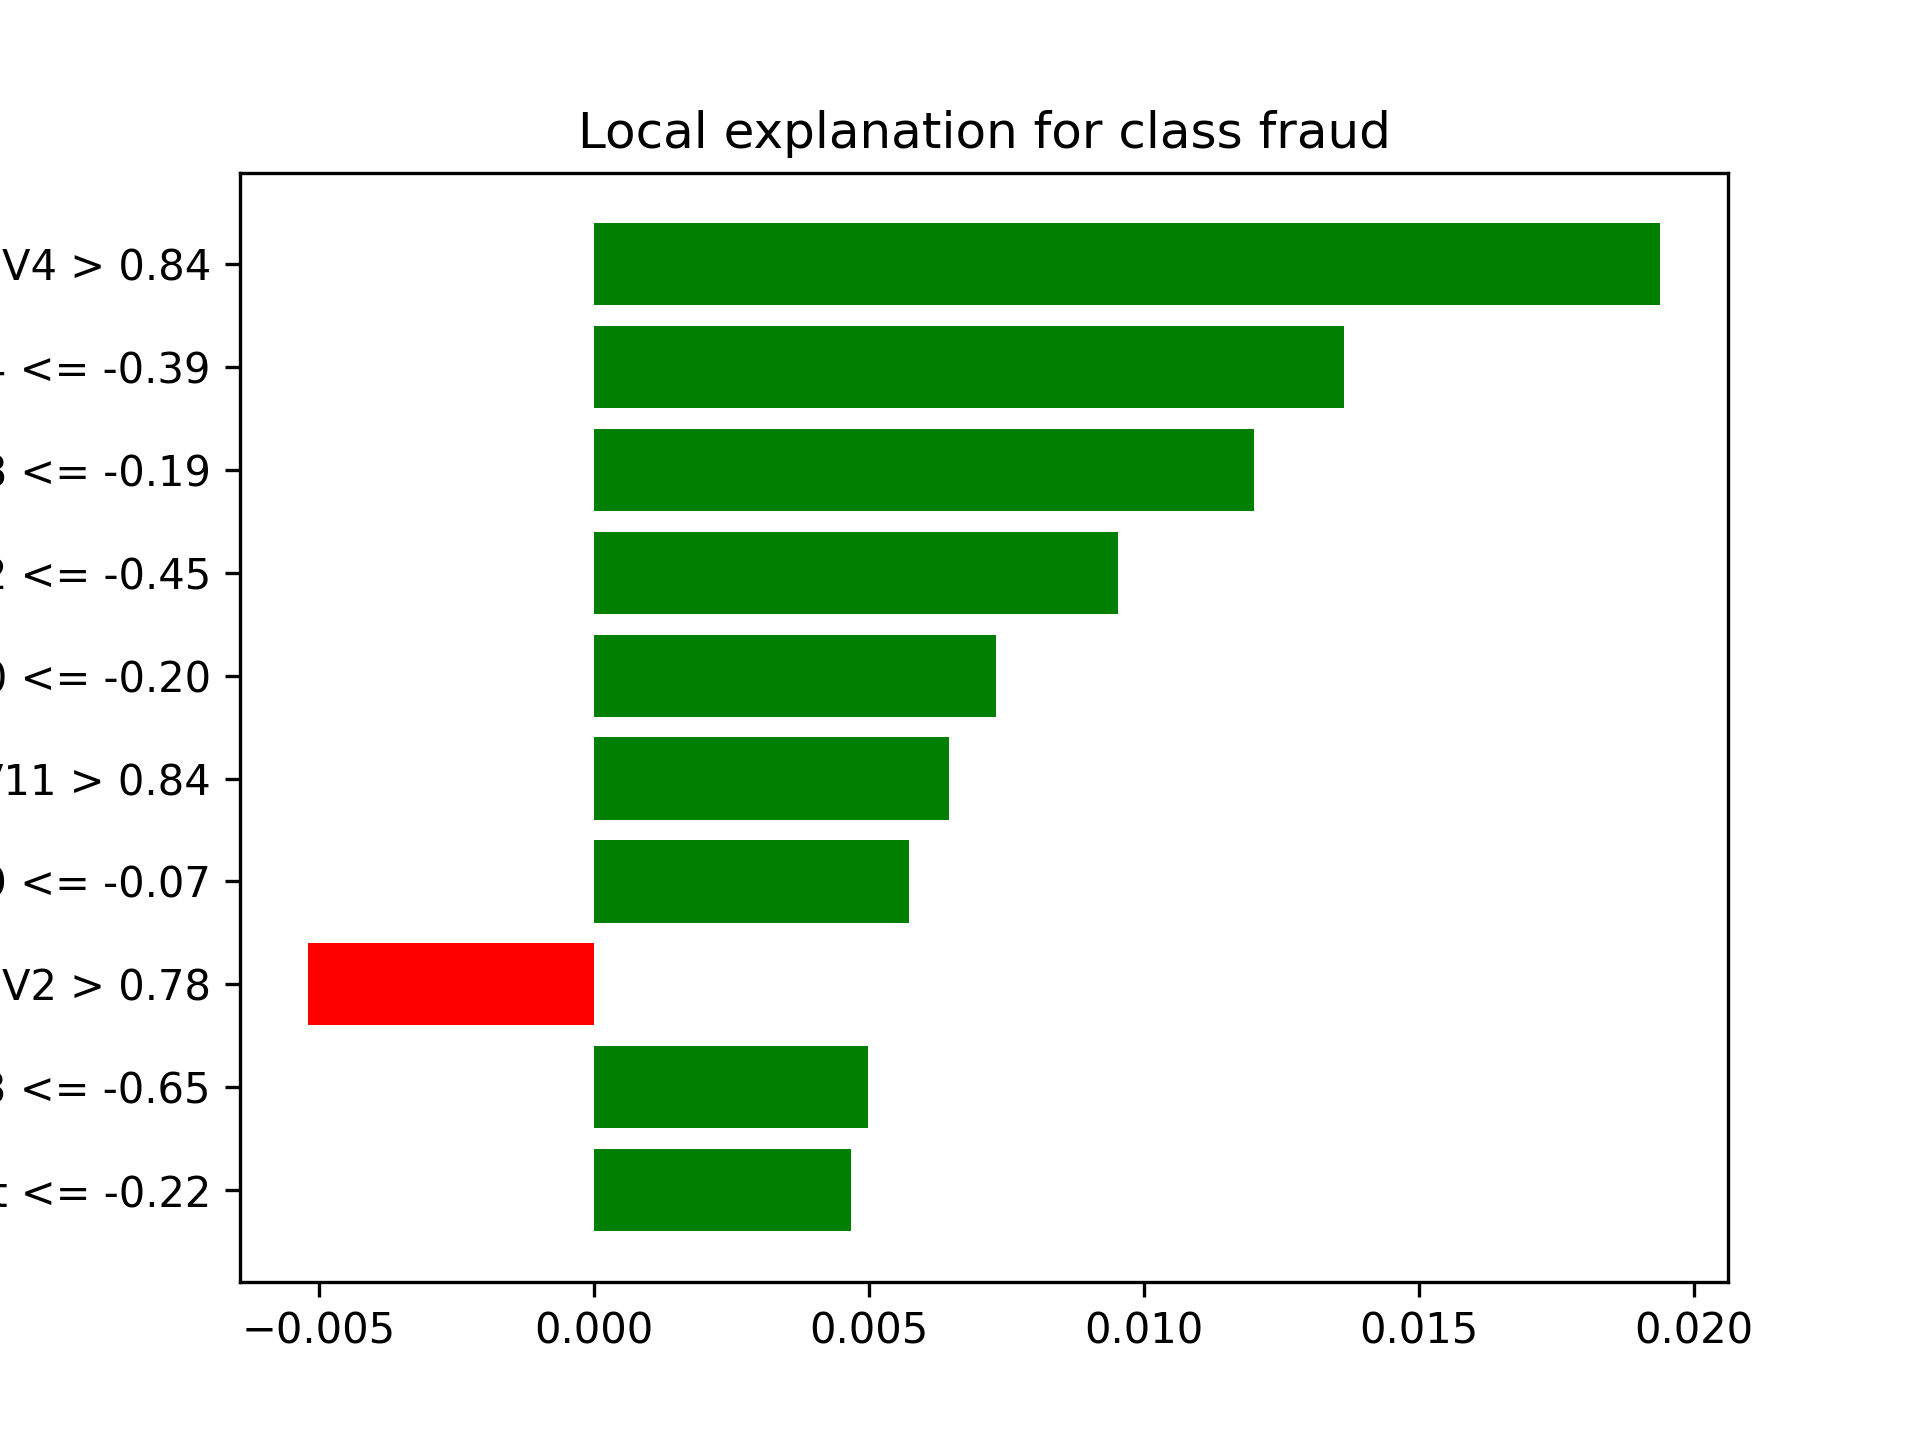

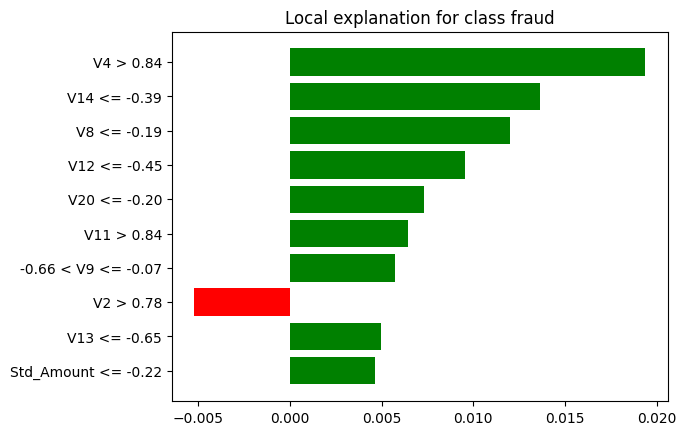

In [97]:
import matplotlib.pyplot as plt

fig = exp.as_pyplot_figure()
fig.savefig("lime_explanation_sample.png", dpi=300)

# Optionally display in notebook
from IPython.display import Image
Image(filename='lime_explanation_sample.png')


This prediction was confidently classified as fraud with probability 1.00, largely driven by:

1.Very low values in V14, V8, V12, and V20, all contributing positively toward fraud classification.

2.Very high values in V4, V11, and V2 also aligned with the model’s learned fraud patterns.

## For Unsupervised Models (Isolation Forest):

In [74]:
explainer_iso = LimeTabularExplainer(
    training_data=Xtrain_final.values,
    feature_names=Xtrain_final.columns,
    mode='regression'
)

In [75]:
predict_fn = lambda x: iso_forest.decision_function(x).reshape(-1, 1)

In [77]:
anomaly_scores = iso_forest.decision_function(Xtest)
high_anomaly_index = anomaly_scores.argmax()  # Highest score
low_anomaly_index = anomaly_scores.argmin()   # Lowest score
instance_high = Xtest.iloc[high_anomaly_index]
instance_low = Xtest.iloc[low_anomaly_index]

In [78]:
exp_high = explainer_iso.explain_instance(
    instance_high.values,
    predict_fn,
    num_features=10
)
exp_low = explainer_iso.explain_instance(
    instance_low.values,
    predict_fn,
    num_features=10
)

C:\Users\Vishal Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\Vishal Kumar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [79]:
exp_high.show_in_notebook()

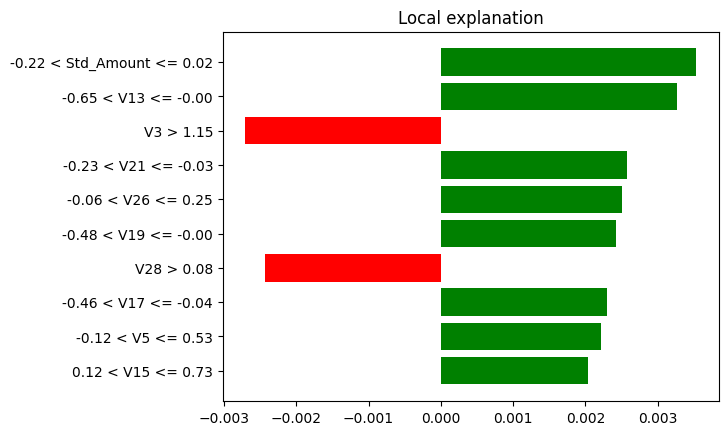

In [91]:
import matplotlib.pyplot as plt

fig = exp_high.as_pyplot_figure()
fig.savefig("lime_explanation_high.png", dpi=300)


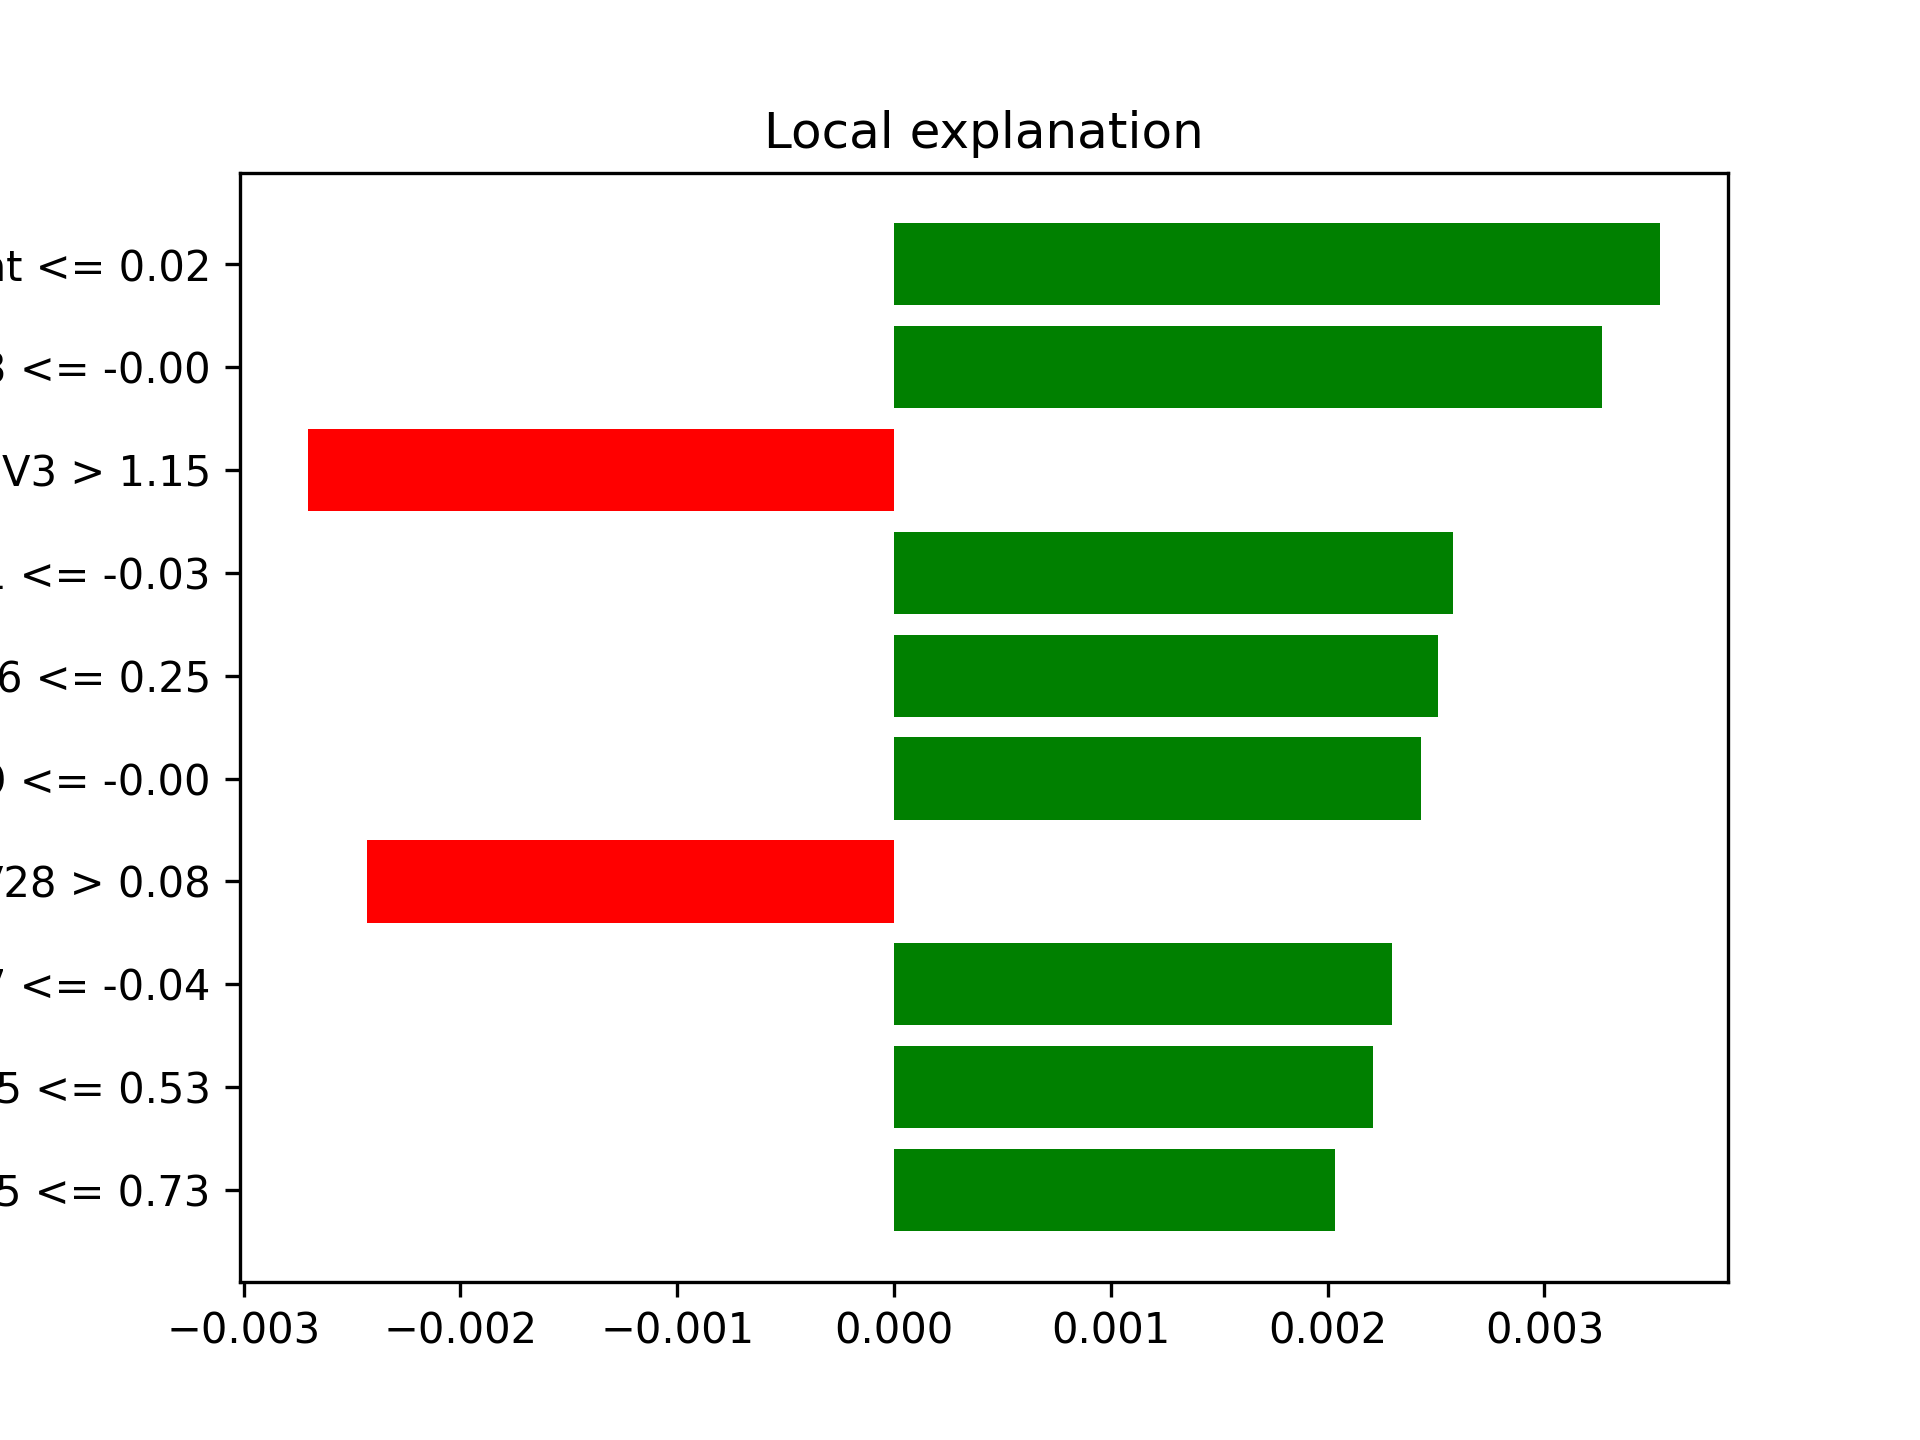

In [92]:
from IPython.display import Image
Image(filename='lime_explanation_high.png')


1.Predicted probability of "fraud": 0.34

2.Predicted class: Not confidently fraud or non-fraud (inconclusive/edge case)

3.Range of possible output: 0.23 (min) → 0.34 (max)

Interpretation

1.The model is not very confident about this prediction.

2.All top 10 feature contributions are very low (~0.00), which means no single feature strongly influenced the outcome.

3.The actual feature values fall into mild risk zones but not extreme ranges.

4.The model seems uncertain because the input lies near the boundary between fraud and non-fraud patterns.

In [80]:
exp_low.show_in_notebook()

In [93]:
exp_low.save_to_file('lime_explanation_low.html')

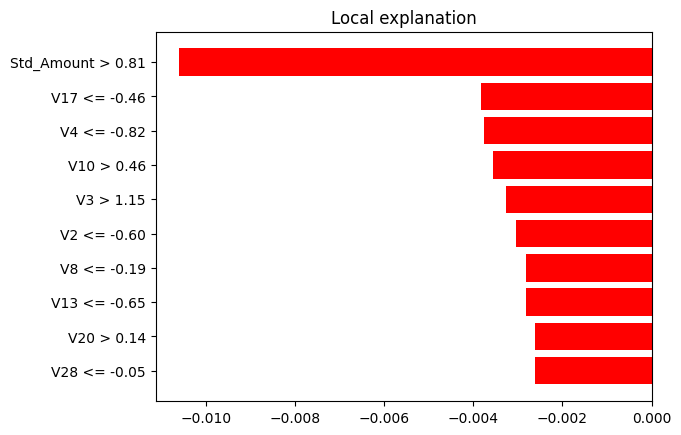

In [95]:
import matplotlib.pyplot as plt

fig = exp_low.as_pyplot_figure()
fig.savefig("lime_explanation_low.png", dpi=300)

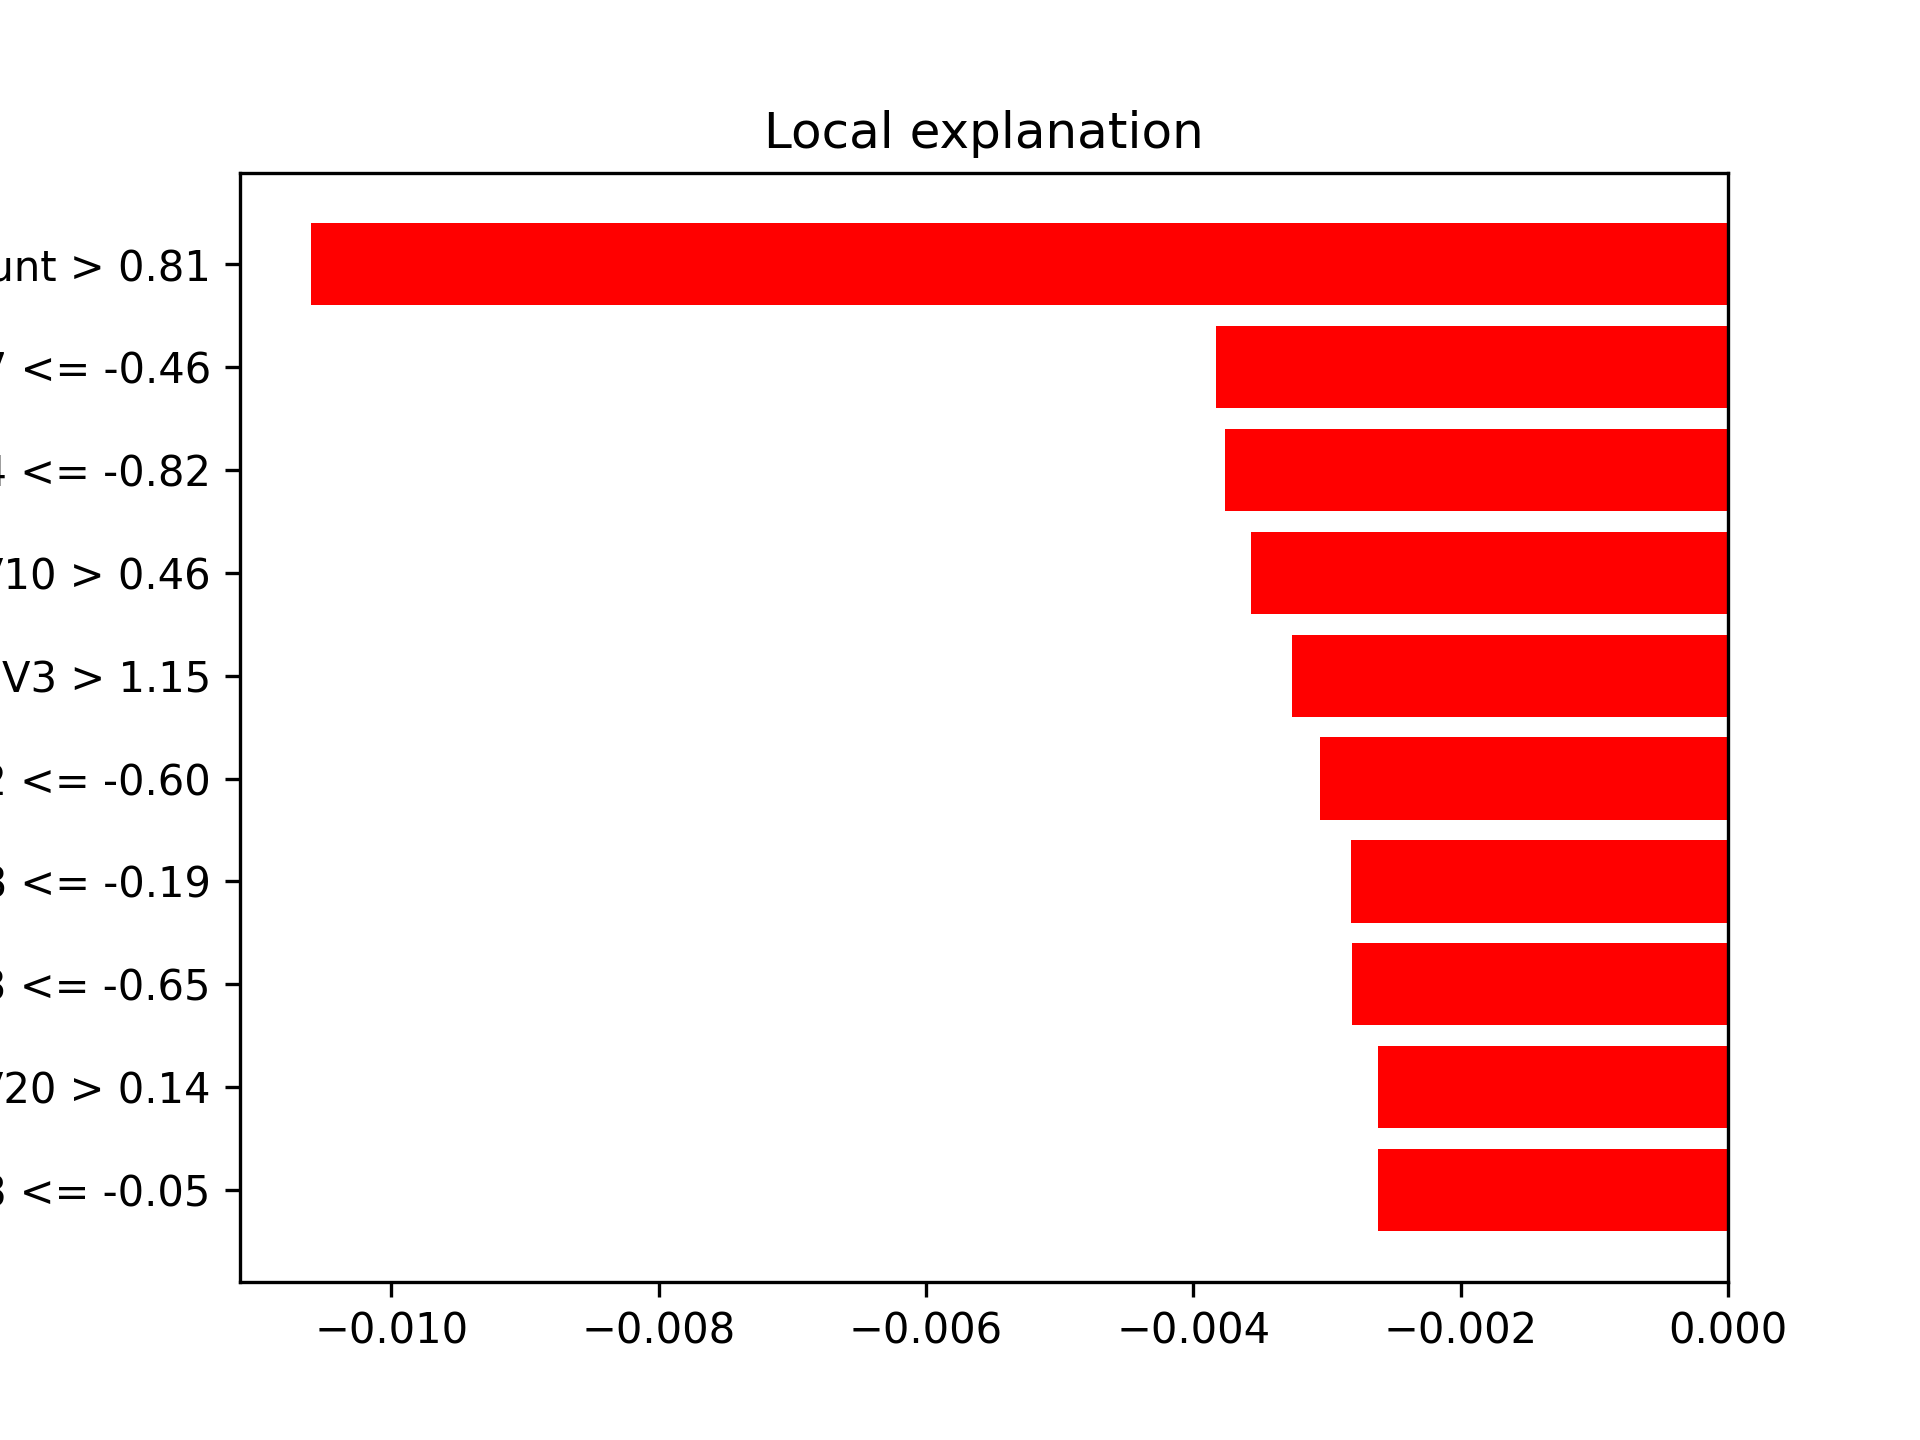

In [96]:
from IPython.display import Image
Image(filename='lime_explanation_low.png')


Prediction Summary

Predicted probability of "fraud": -0.13 (may be due to internal scaling — in classification, this is typically clipped to 0.0)

Predicted class: Non-fraud

Range of prediction values: -0.13 (min) → 0.33 (max)

Interpretation

Despite many extreme feature values, the model predicts non-fraud with a low confidence score.

Only one feature (Std_Amount > 0.81) has a non-zero contribution (+0.01) toward fraud.

This is surprising, since values like V10 = 23.75, V17 = -8.51, and V28 = -11.71 are quite extreme.

It could indicate:

These values occur in non-fraud cases too, or

The model might lack sensitivity to these variables, possibly needing re-tuning or additional feature engineering.